In [16]:
##Logistic Regression 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
#target column is 'survived' .which indicates wheather a passenger survived or not (1 for survived and 0 for not survived)
titanic_train_data=pd.read_csv(r"C:\Users\durwa\Downloads\titanic train data.csv")
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
titanic_test_data=pd.read_csv(r"C:\Users\durwa\Downloads\titanic test data.csv")
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
#ssome columns are not useful for prediction so we deleted that columns.
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic_train_data.drop(columns=columns_to_drop, inplace=True)
titanic_test_data.drop(columns=columns_to_drop, inplace=True)

In [26]:
#1. Data Exploration:
#a. Load the dataset and perform exploratory data analysis (EDA).
#b. Examine the features, their types, and summary statistics.
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.
titanic_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [28]:
#2. Data Preprocessing:handling missing value
titanic_train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
titanic_test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [29]:
len(titanic_train_data)

891

In [32]:
len(titanic_test_data)

418

In [135]:
#Calculate the percentage of missig values in each column.
for i in titanic_train_data.isnull().sum():
    print((i/len(titanic_train_data))*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
19.865319865319865 %
0.0 %
0.0 %
0.0 %
0.0 %
77.10437710437711 %
0.22446689113355783 %


In [33]:
for i in titanic_test_data.isnull().sum():
    print((i/len(titanic_test_data))*100,'%')

0.0 %
0.0 %
20.574162679425836 %
0.0 %
0.0 %
0.23923444976076555 %
0.0 %


In [34]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [36]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [37]:
Embarked_mode=titanic_train_data['Embarked'].mode()[0]
Embarked_mode

'S'

In [38]:
Age_median = titanic_train_data['Age'].median()
Age_median

28.0

In [39]:
Age_median = titanic_test_data['Age'].median()
Age_median

27.0

In [45]:
Fare_median = titanic_test_data['Fare'].median()
Fare_median

14.4542

In [40]:
titanic_train_data['Age'].fillna(Age_median, inplace=True)

In [41]:
titanic_test_data['Age'].fillna(Age_median, inplace=True)

In [46]:
titanic_test_data['Fare'].fillna(Fare_median, inplace=True)

In [47]:
titanic_train_data['Embarked'].fillna(Embarked_mode, inplace=True)

In [48]:
titanic_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [49]:
titanic_test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

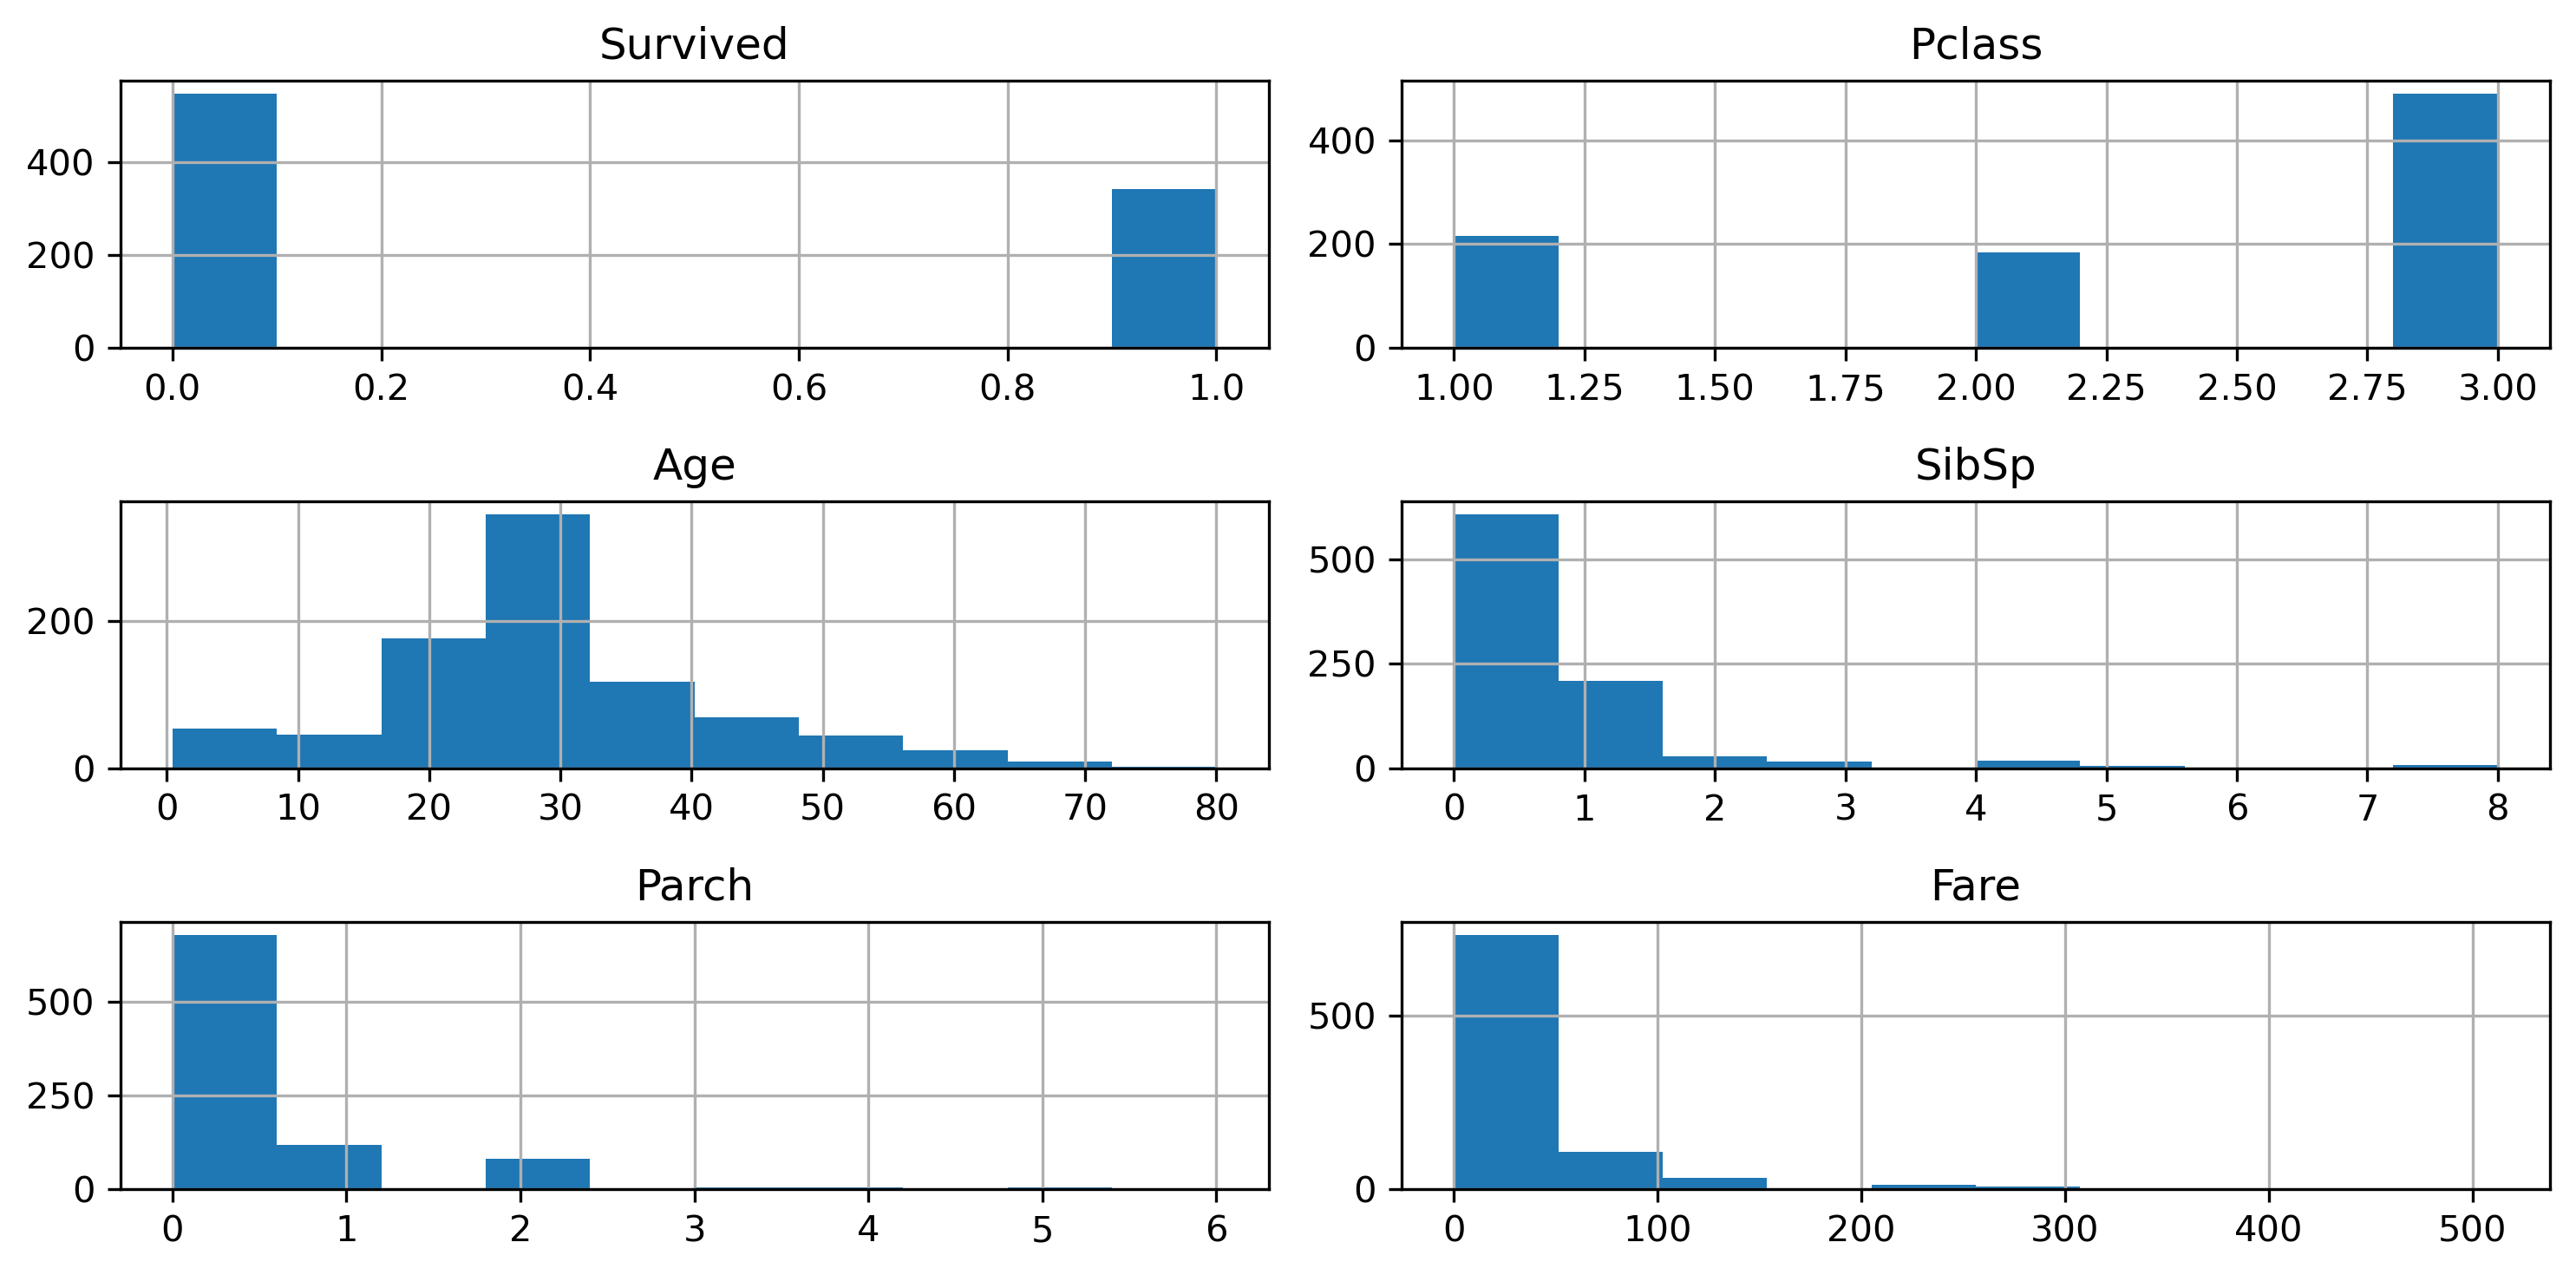

In [50]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_train_data.hist()
plt.tight_layout()

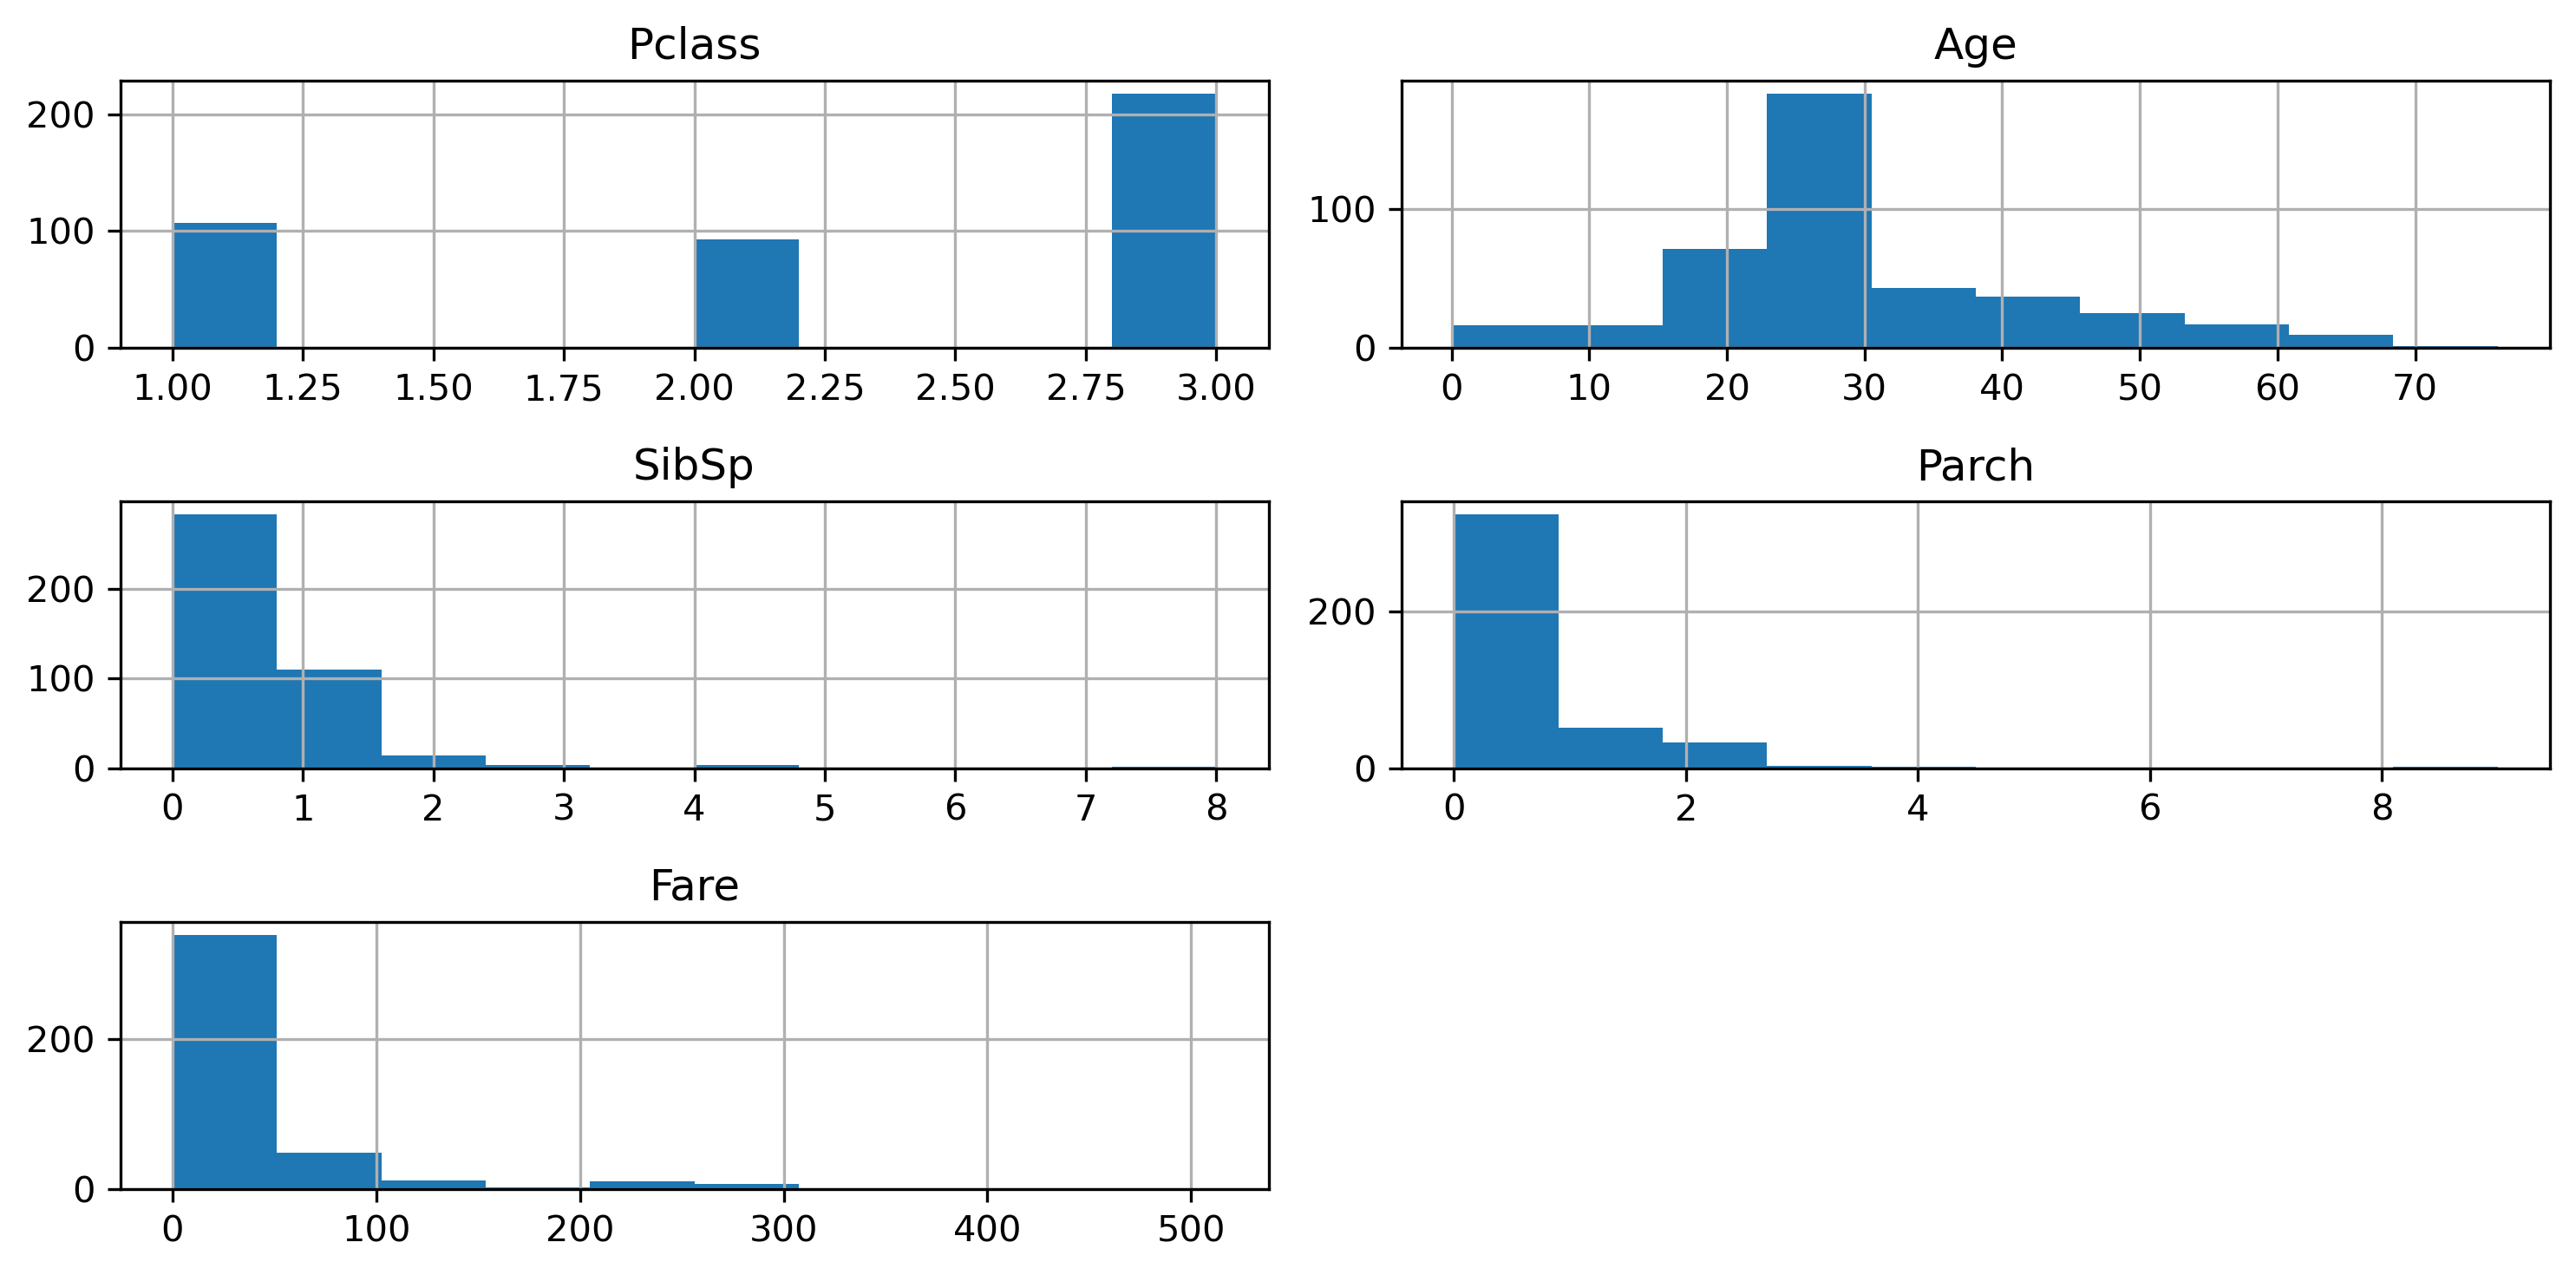

In [58]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_test_data.hist()
plt.tight_layout()

<Axes: >

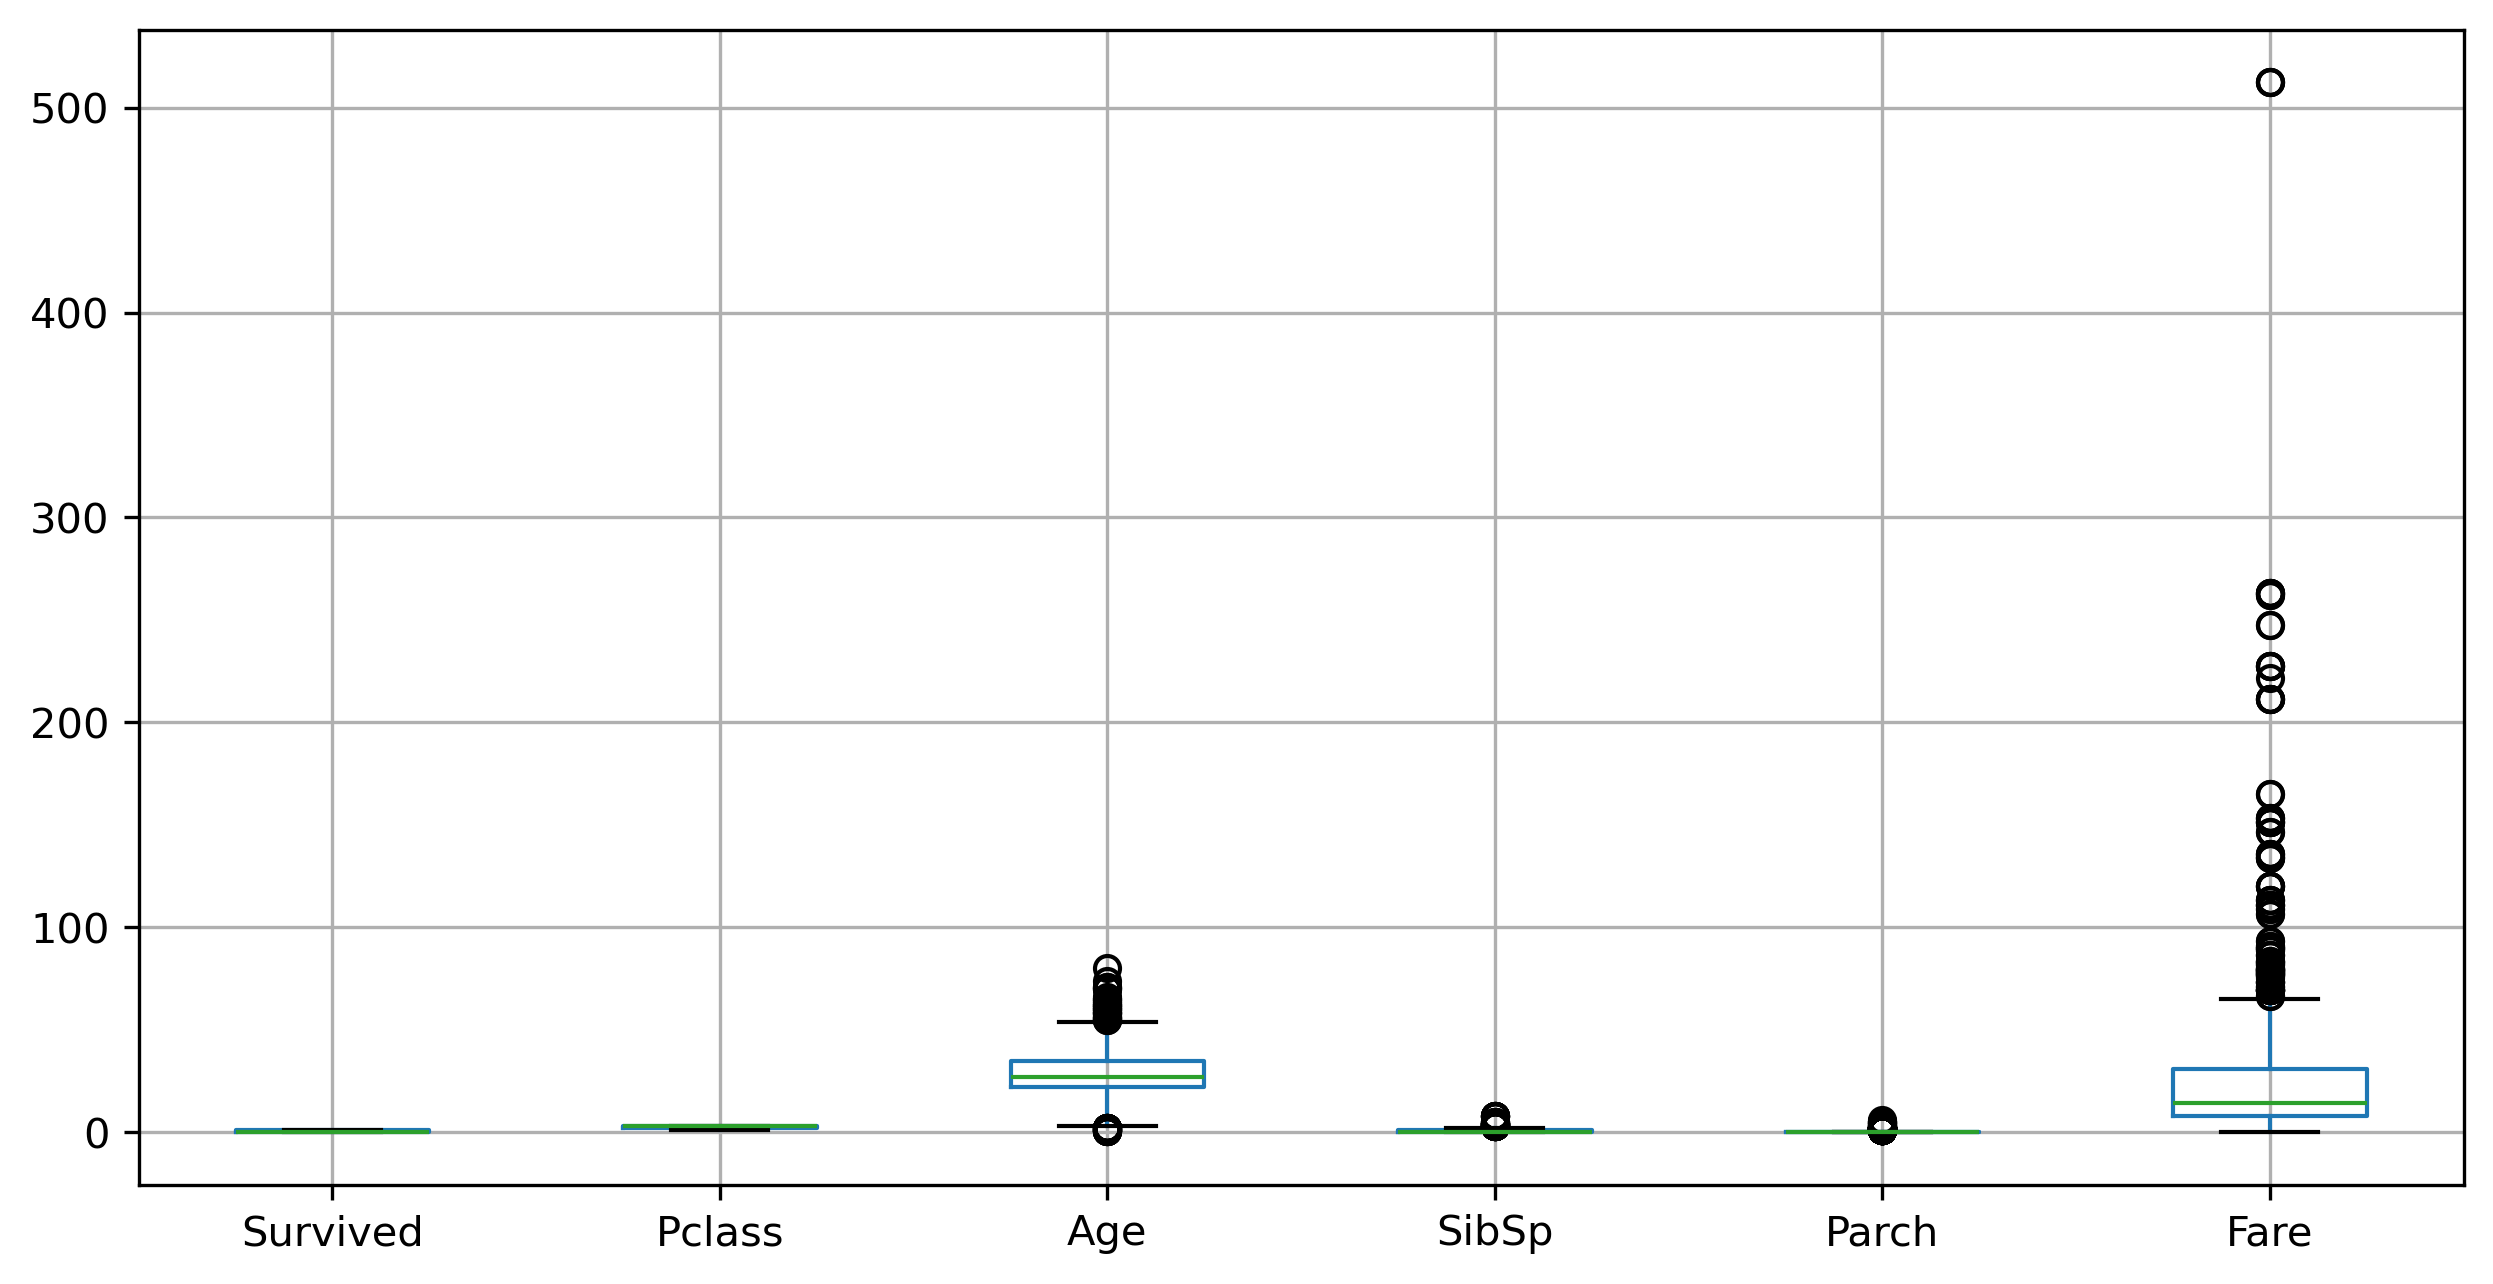

In [51]:
titanic_train_data.boxplot()

<Axes: >

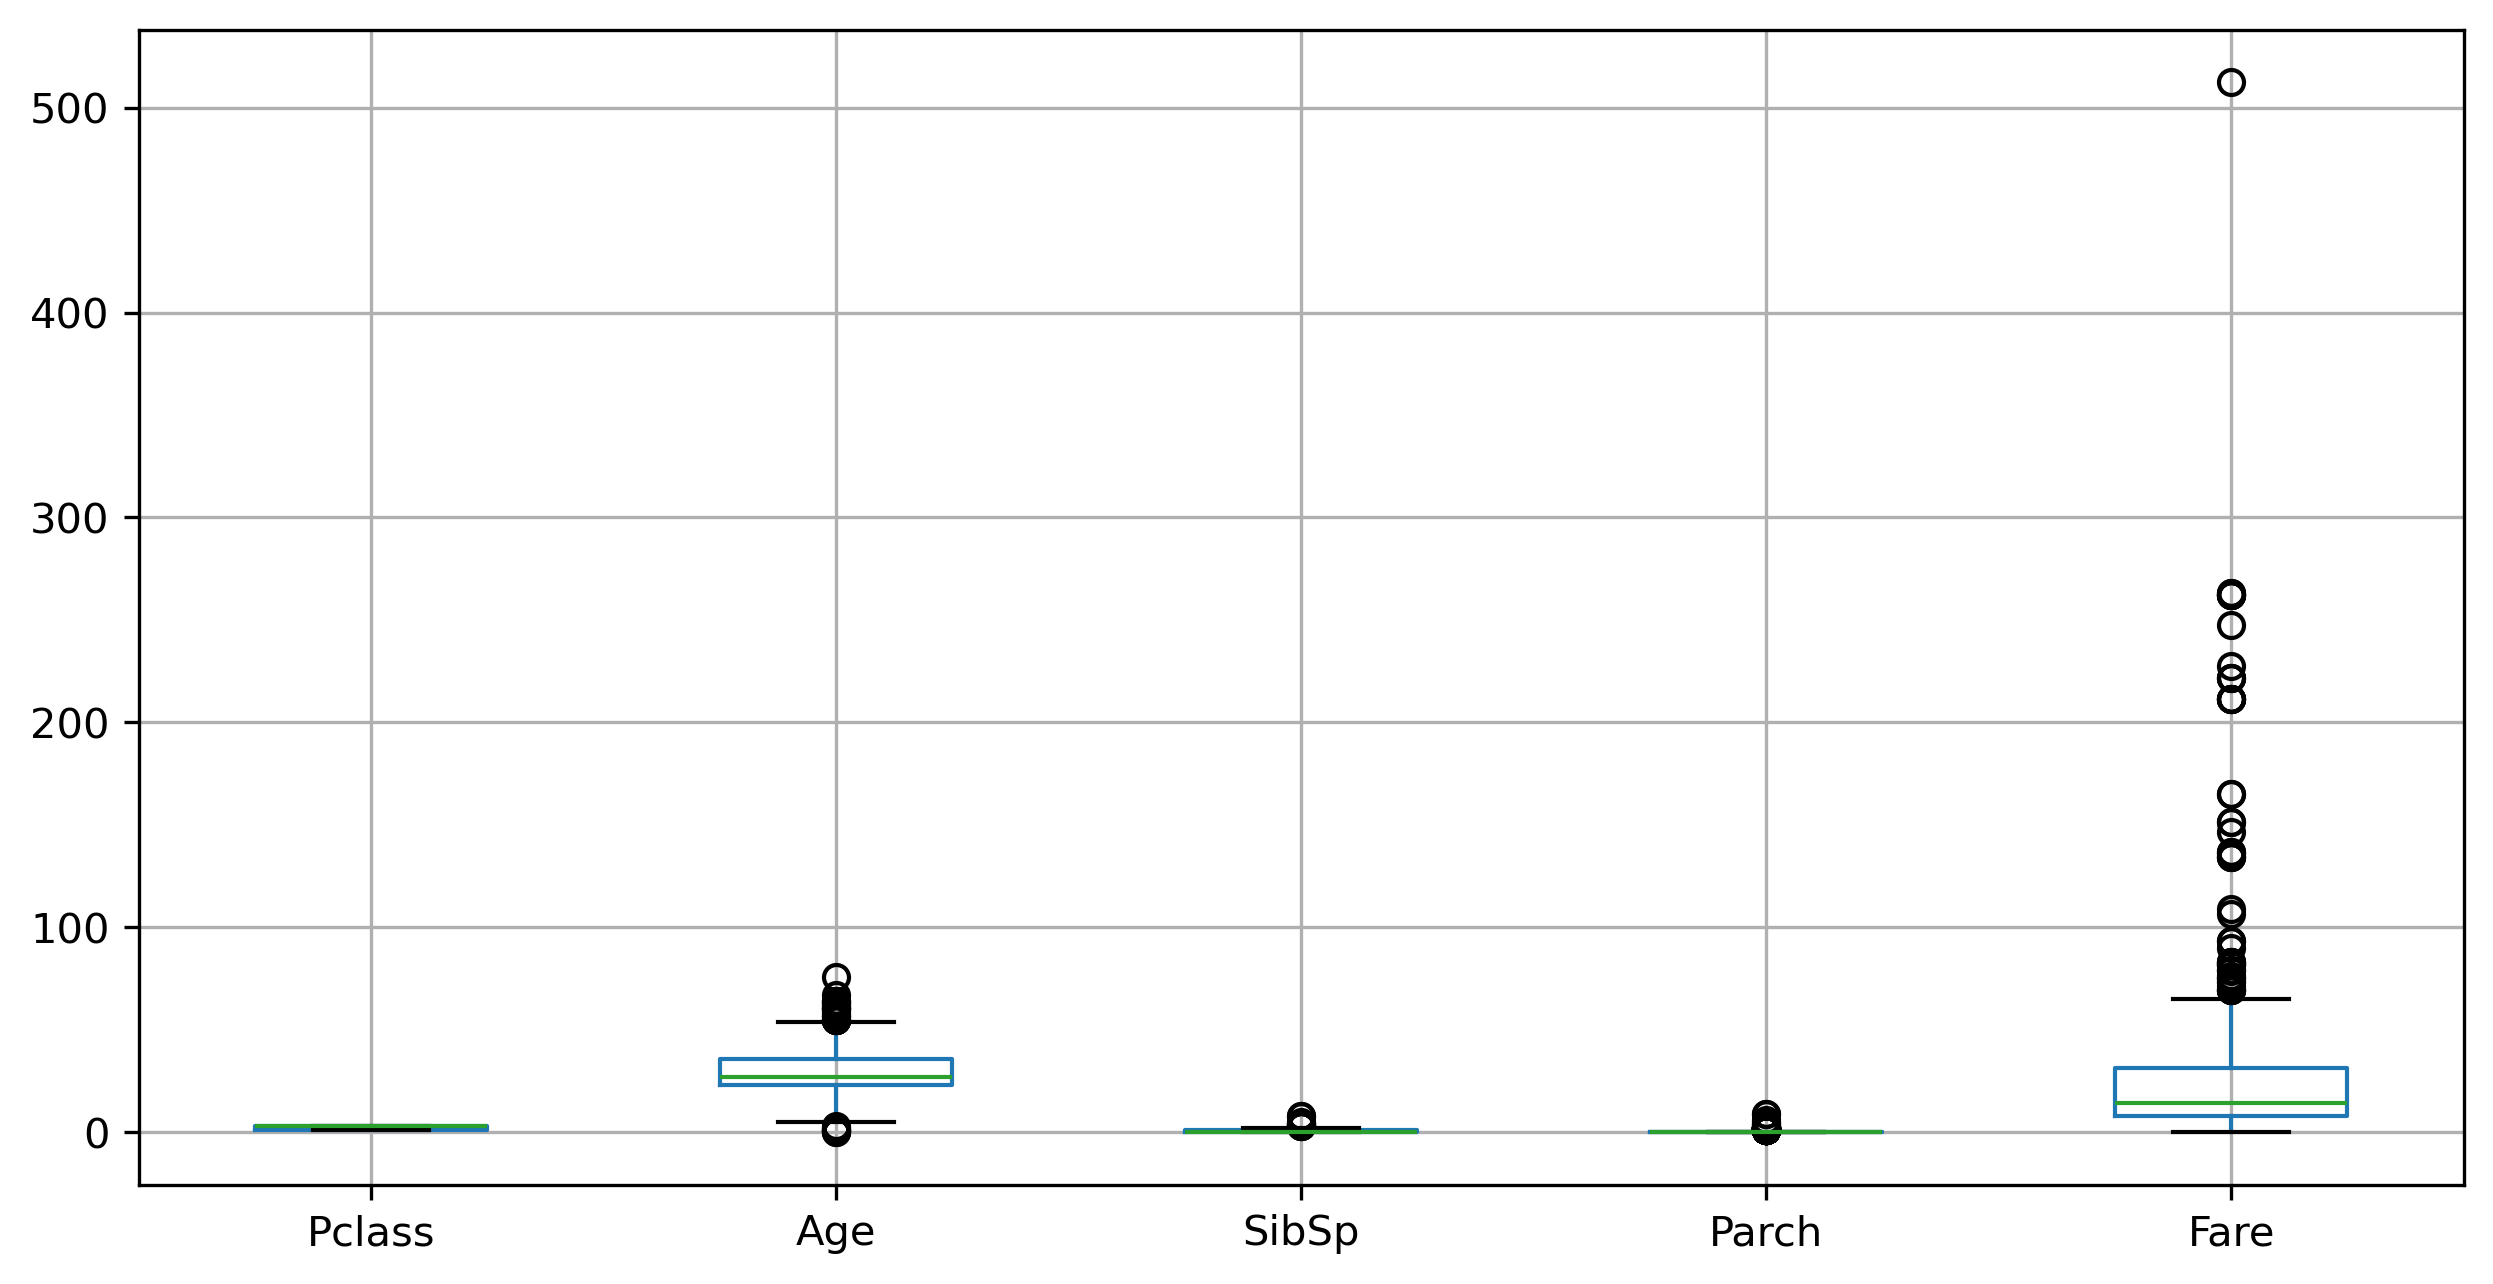

In [59]:
titanic_test_data.boxplot()

In [78]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_train_data[col] = np.where(titanic_train_data[col] > upper, upper, np.where(titanic_train_data[col] < lower, lower,titanic_train_data[col]))

In [84]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        titanic_test_data[col] = np.where(titanic_test_data[col] > upper, upper, np.where(titanic_test_data[col] < lower, lower,titanic_test_data[col]))

In [79]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [86]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [80]:
titanic_train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [87]:
titanic_test_data.dtypes

Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [81]:
#temparary we drop these columns for outlier detection
titanic_train_data.drop(columns=['Sex','Embarked']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [88]:
#temparary we drop these columns for outlier detection
titanic_test_data.drop(columns=['Sex','Embarked']).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [82]:
outlier_detection(titanic_train_data,titanic_train_data.drop(columns=['Sex','Embarked']).columns)

In [89]:
outlier_detection(titanic_test_data,titanic_test_data.drop(columns=['Sex','Embarked']).columns)

<Axes: >

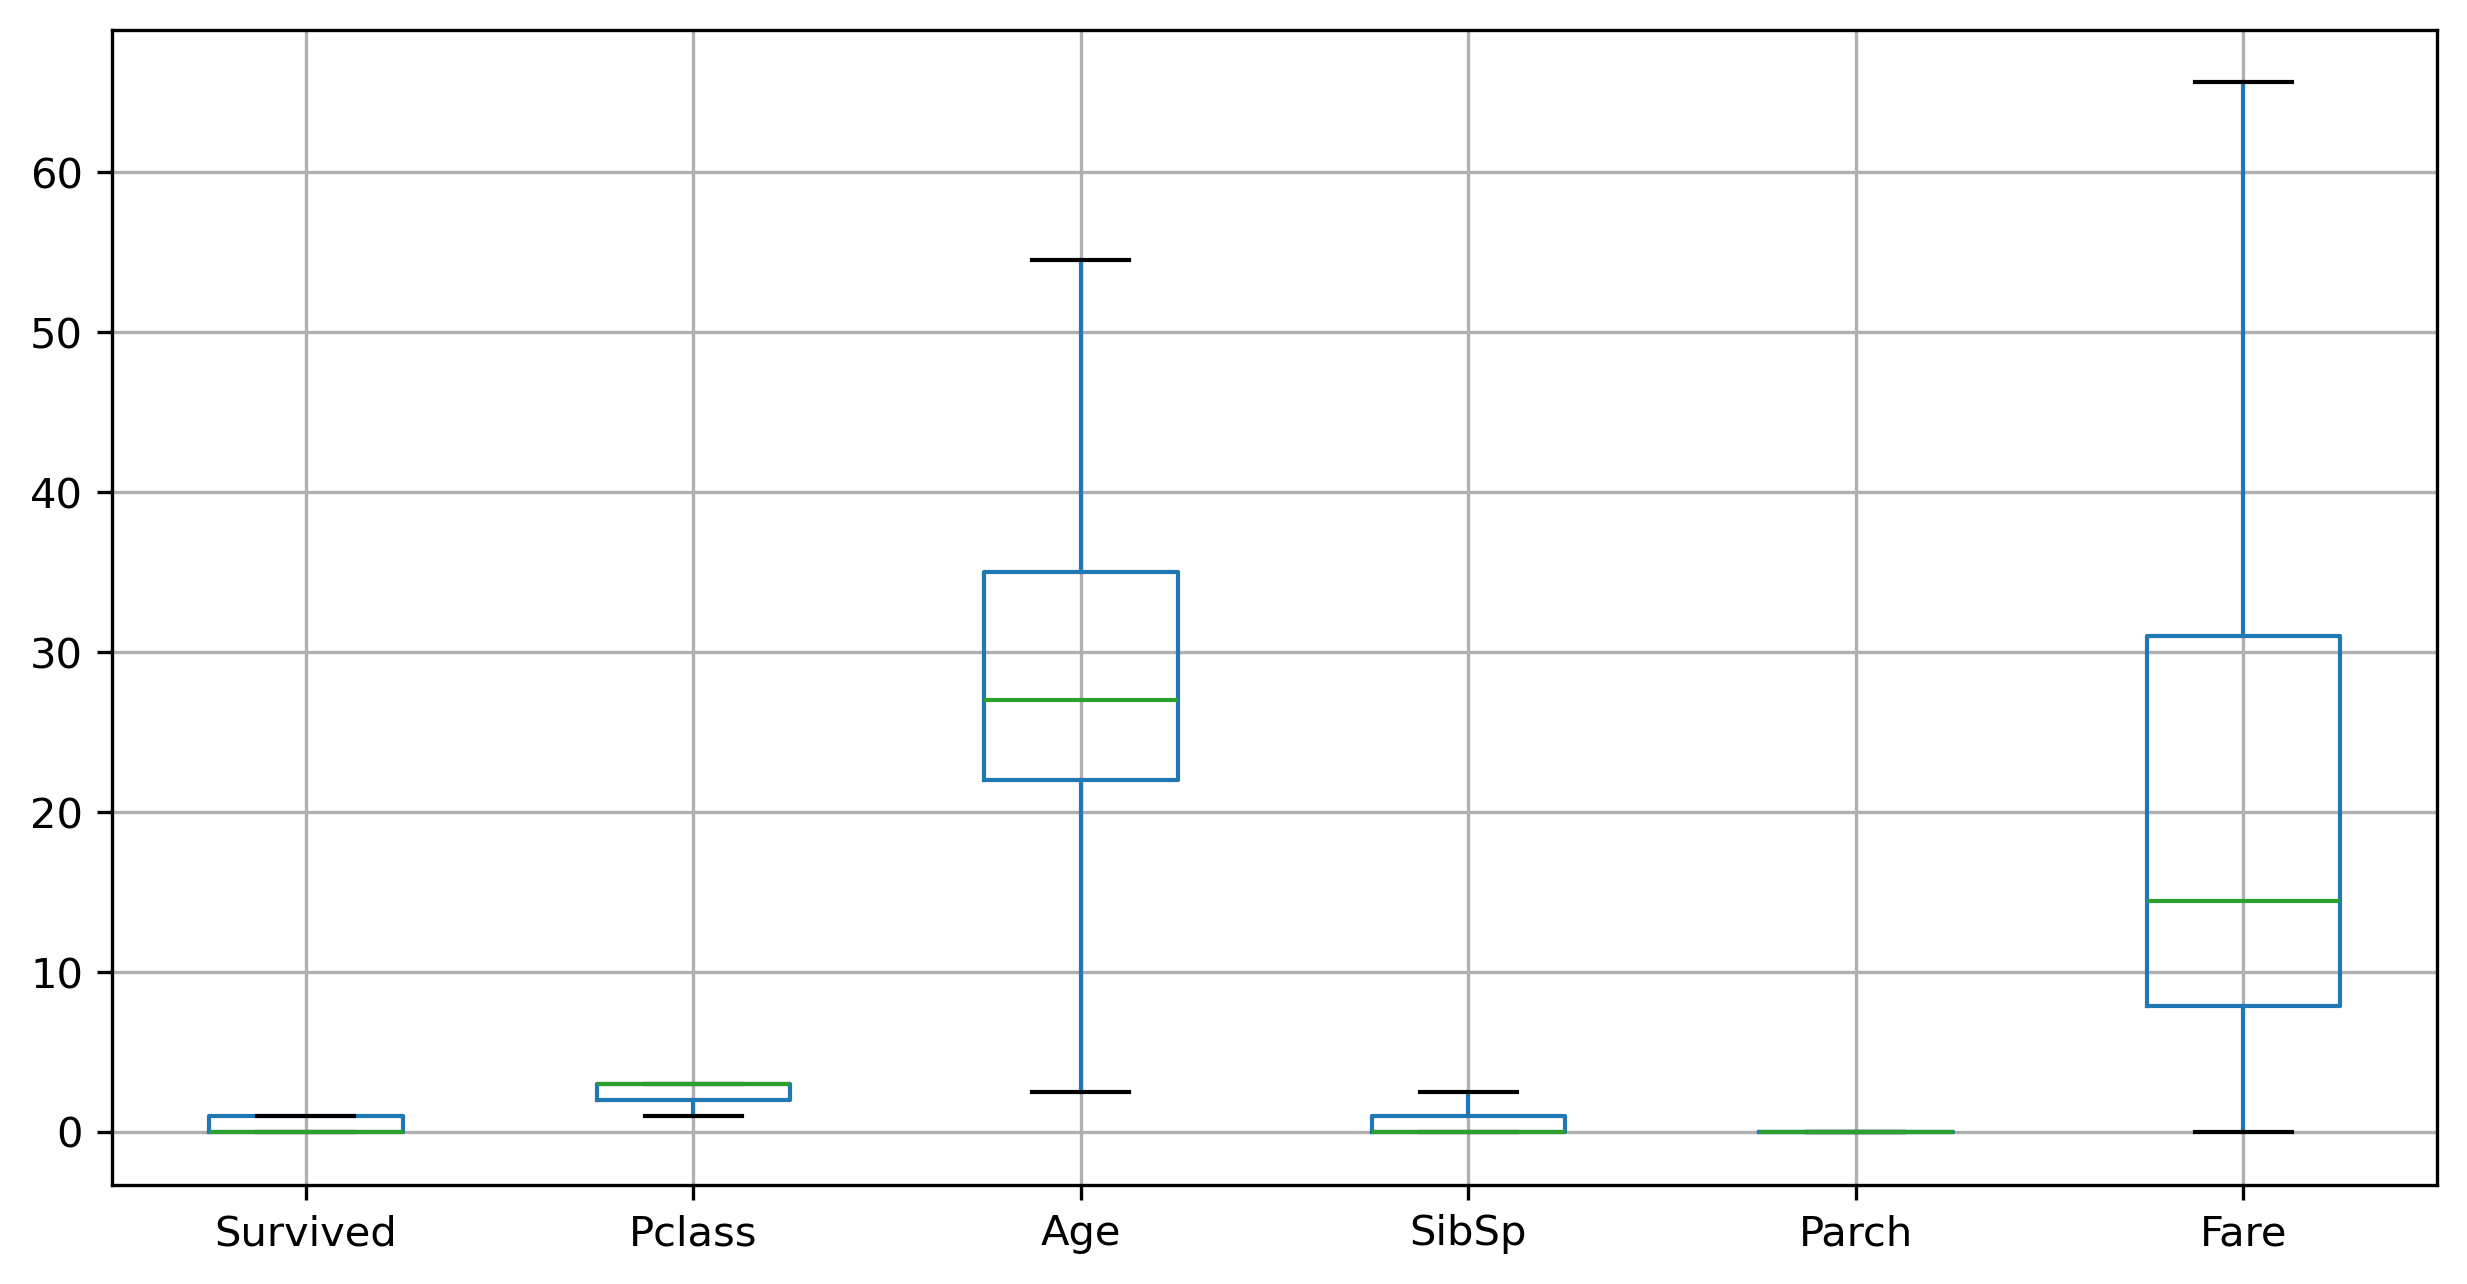

In [83]:
titanic_train_data.boxplot()

<Axes: >

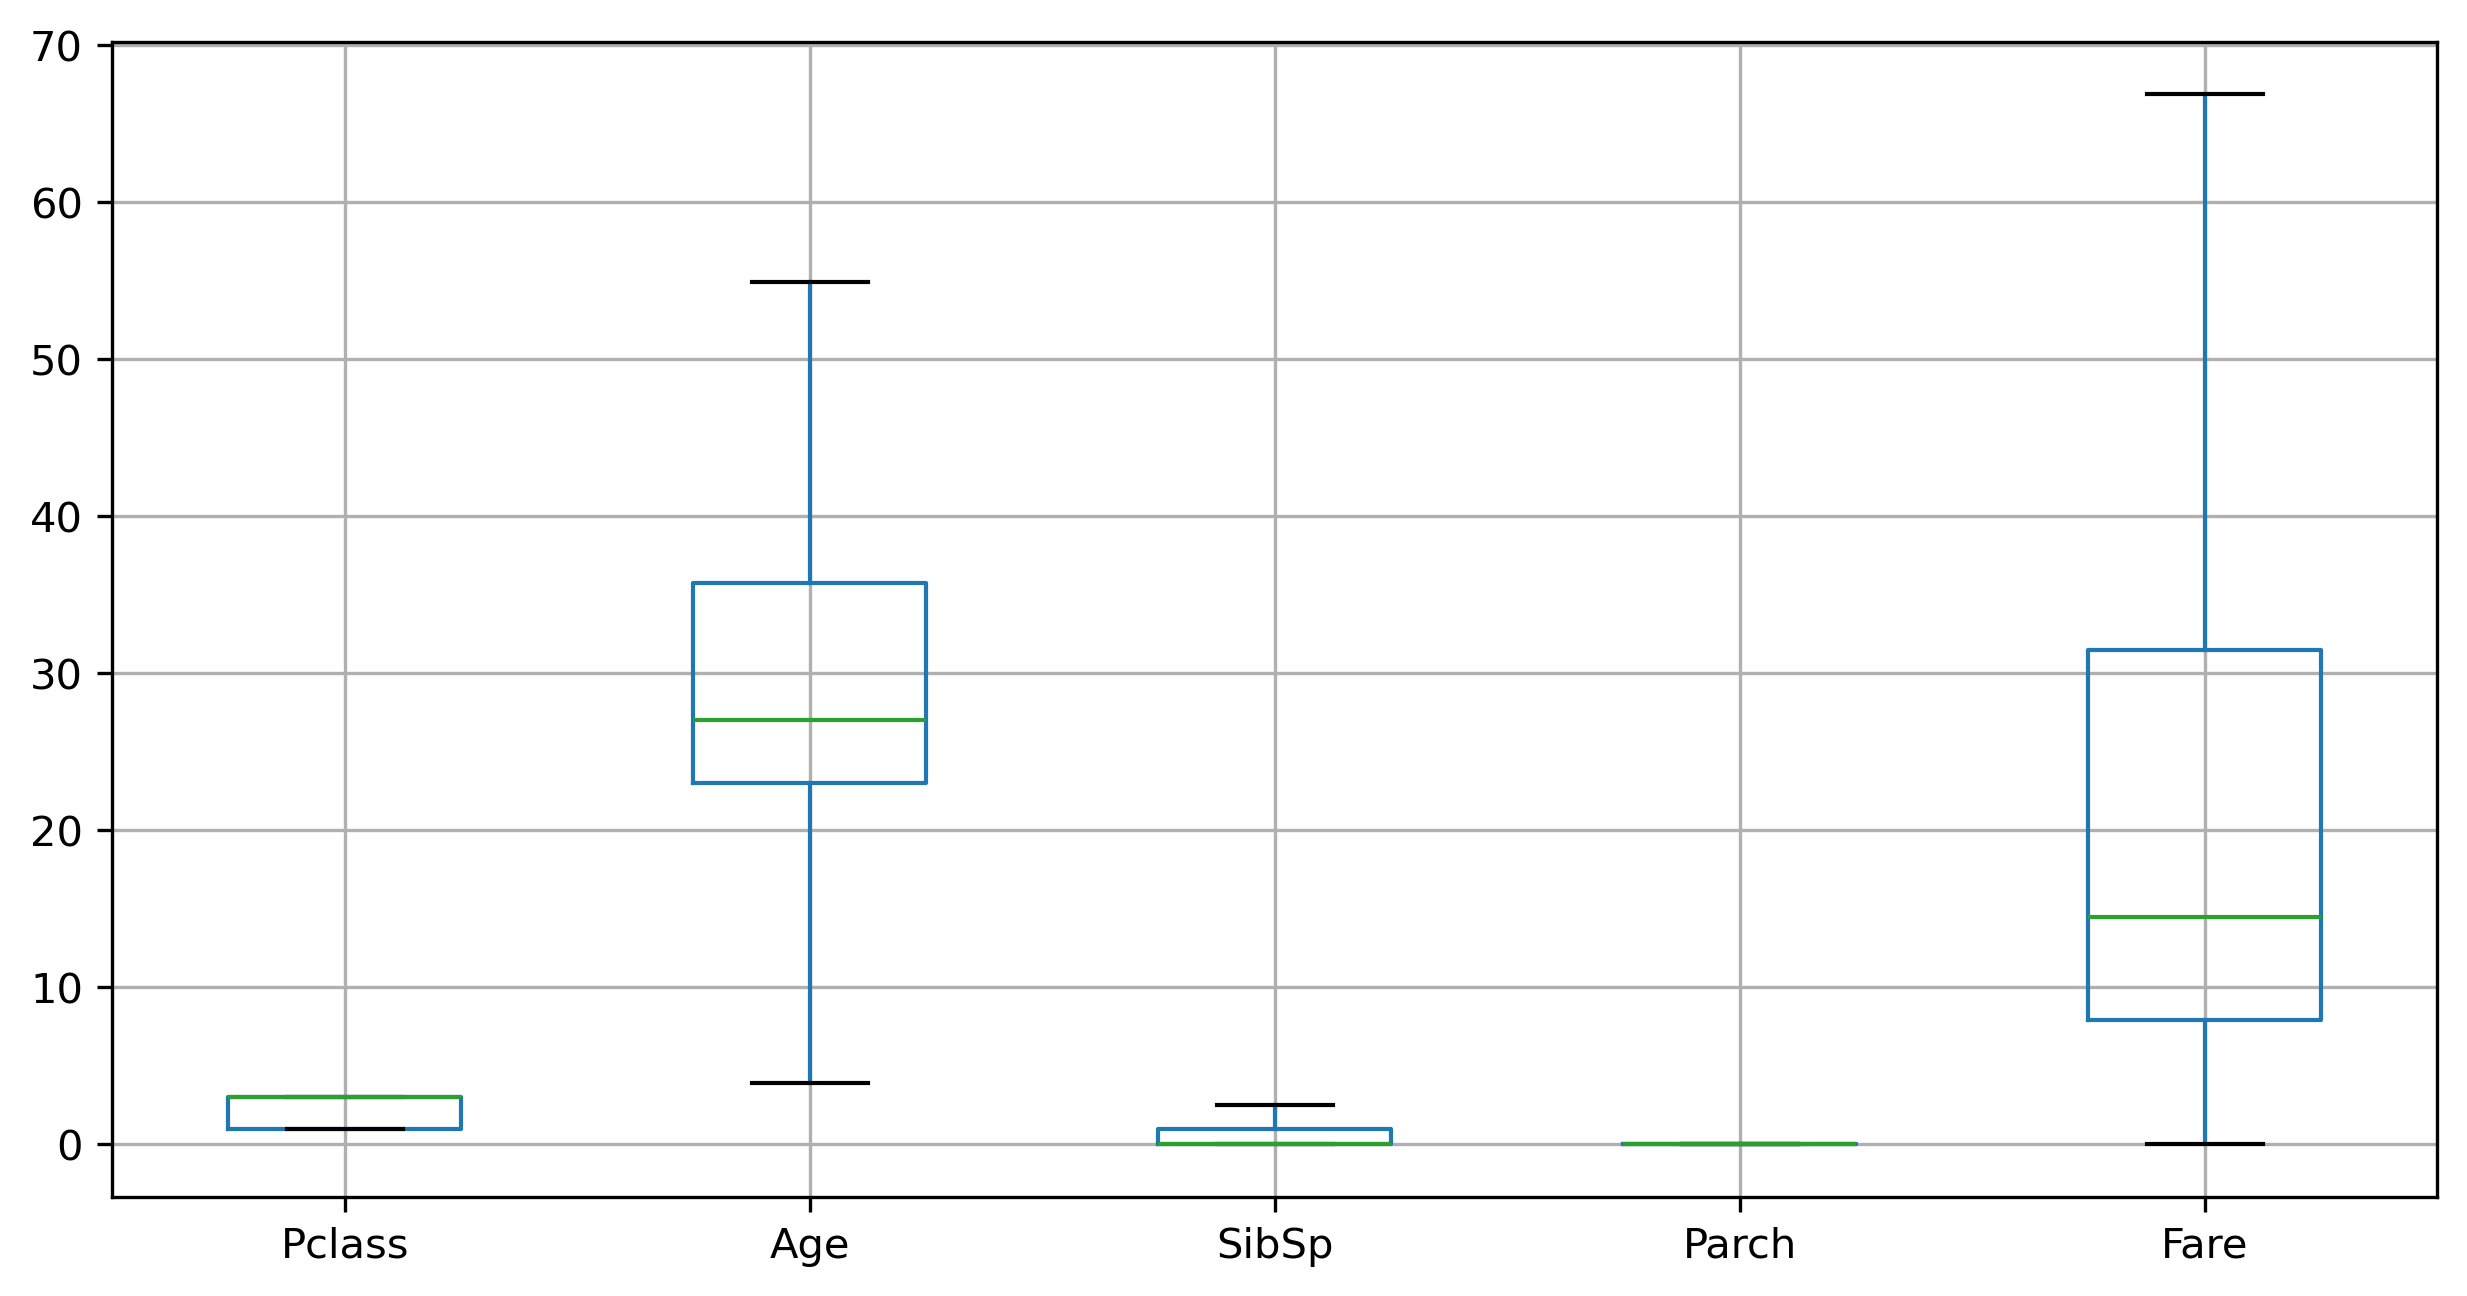

In [90]:
titanic_test_data.boxplot()

In [91]:
#scatter and correlation
titanic_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,65.6344,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S


In [92]:
titanic_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,34.500,0.0,0.0,7.8292,Q
1,3.0,female,47.000,1.0,0.0,7.0000,S
2,2.0,male,54.875,0.0,0.0,9.6875,Q
3,3.0,male,27.000,0.0,0.0,8.6625,S
4,3.0,female,22.000,1.0,0.0,12.2875,S


<Axes: xlabel='Pclass', ylabel='Fare'>

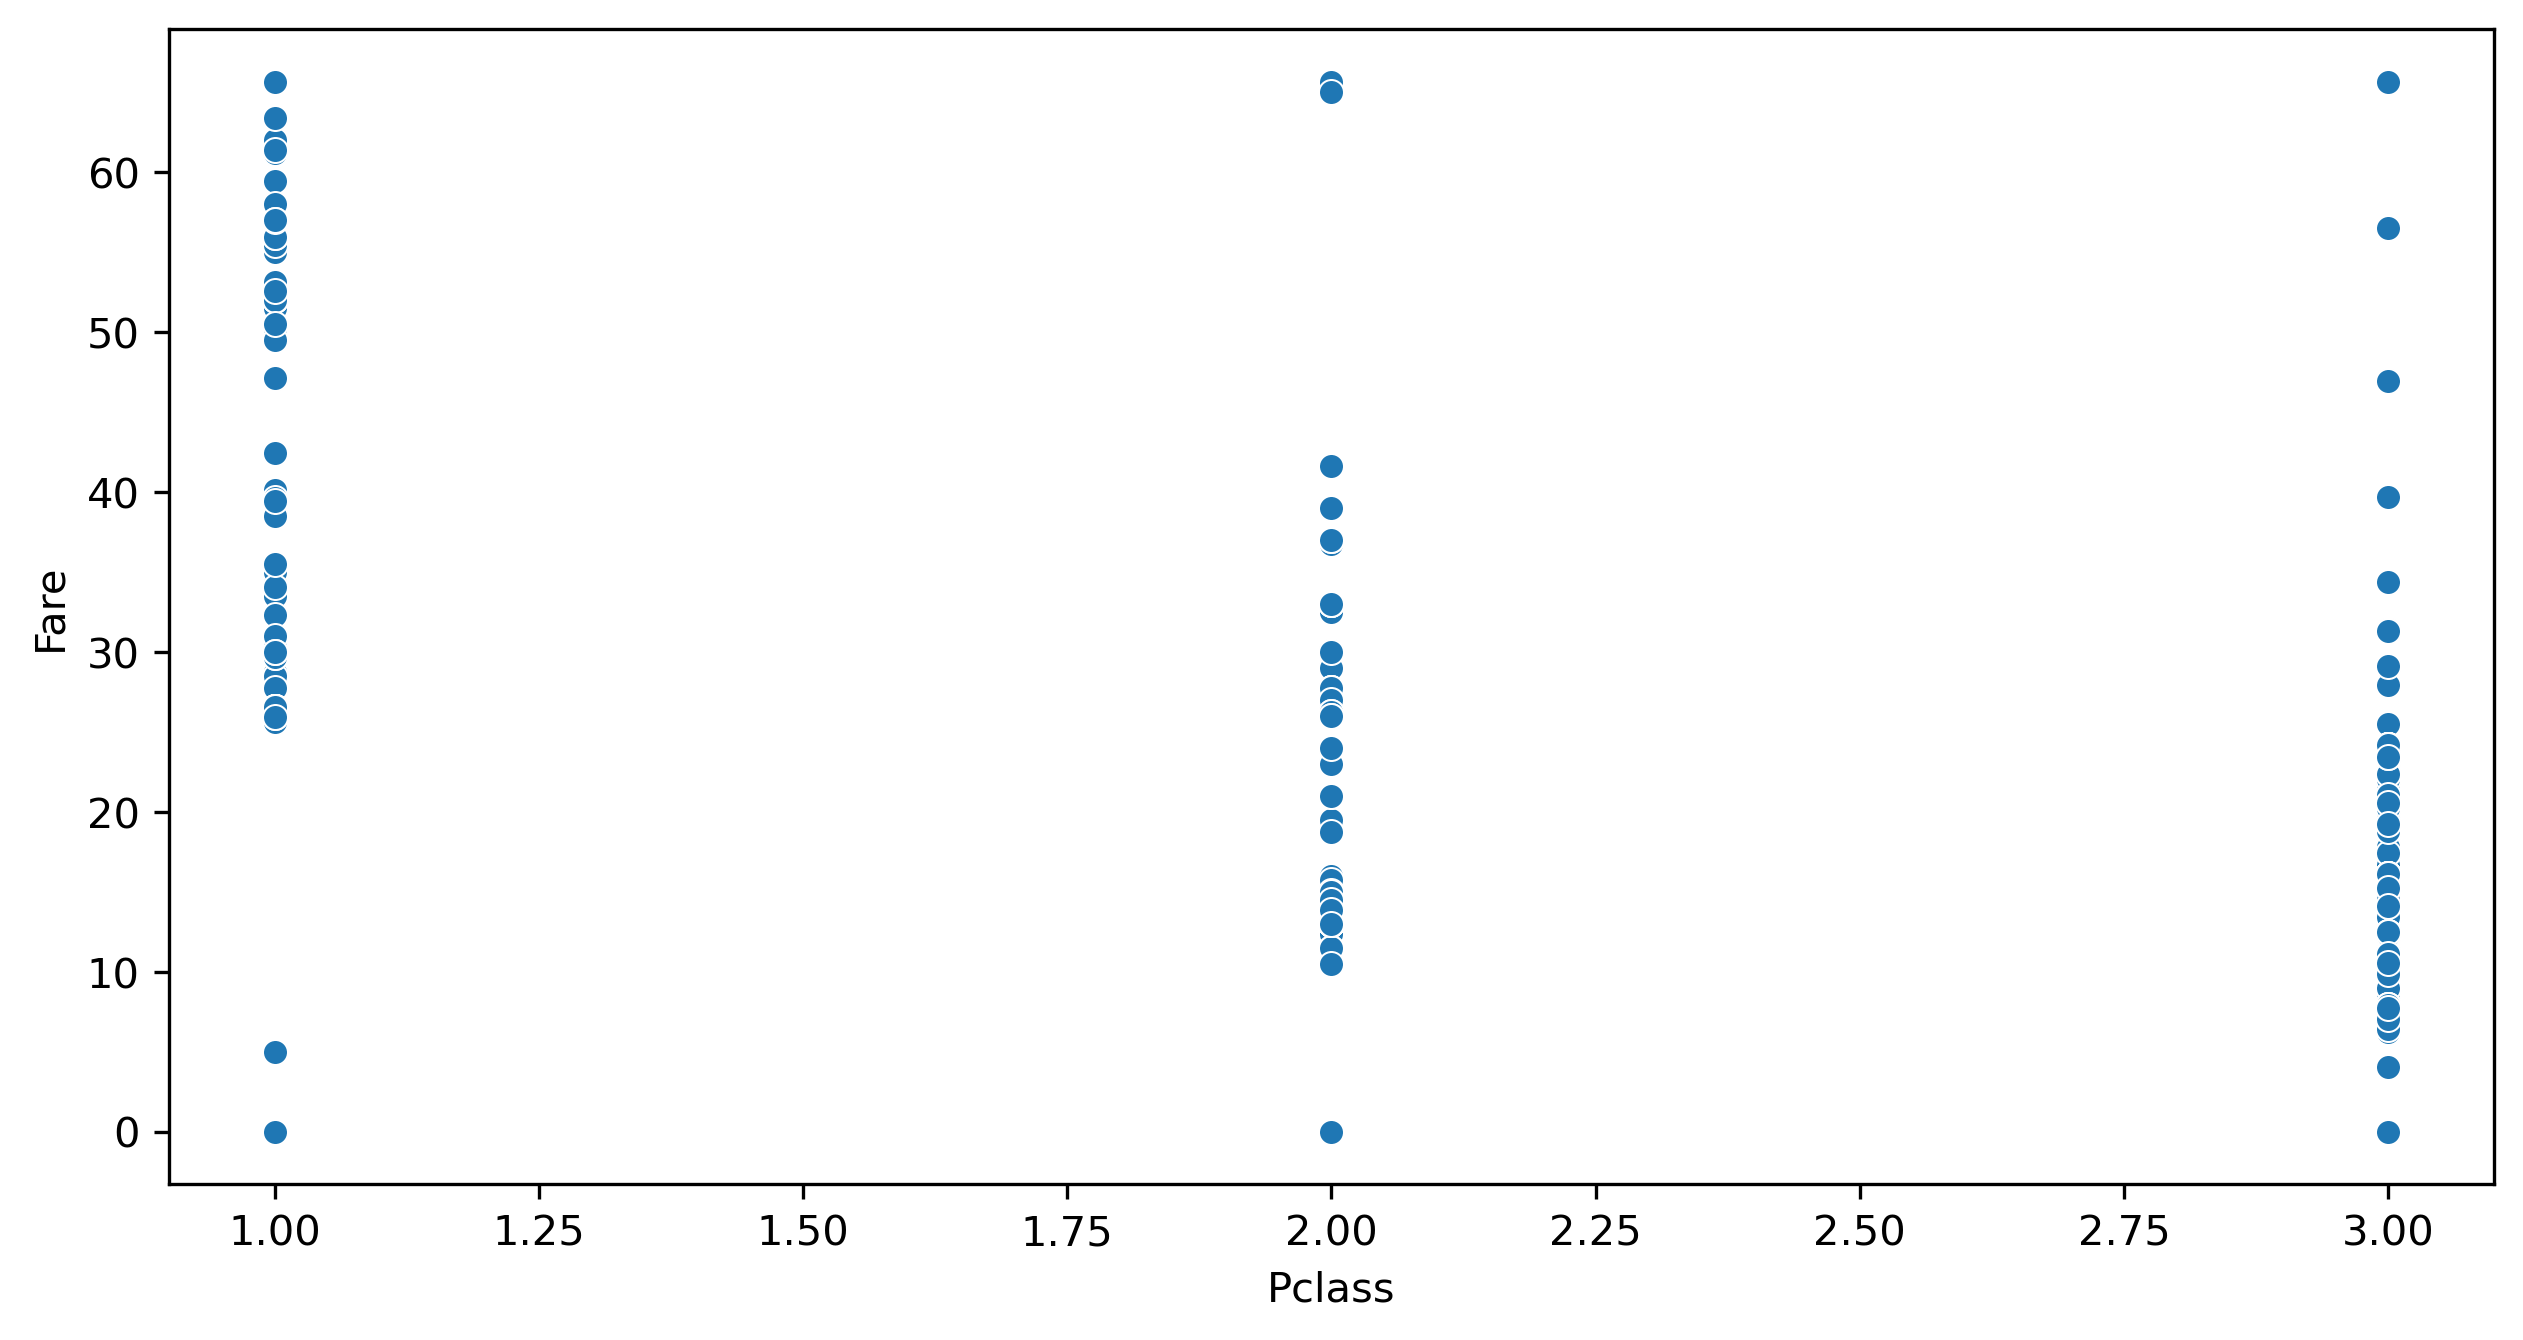

In [93]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

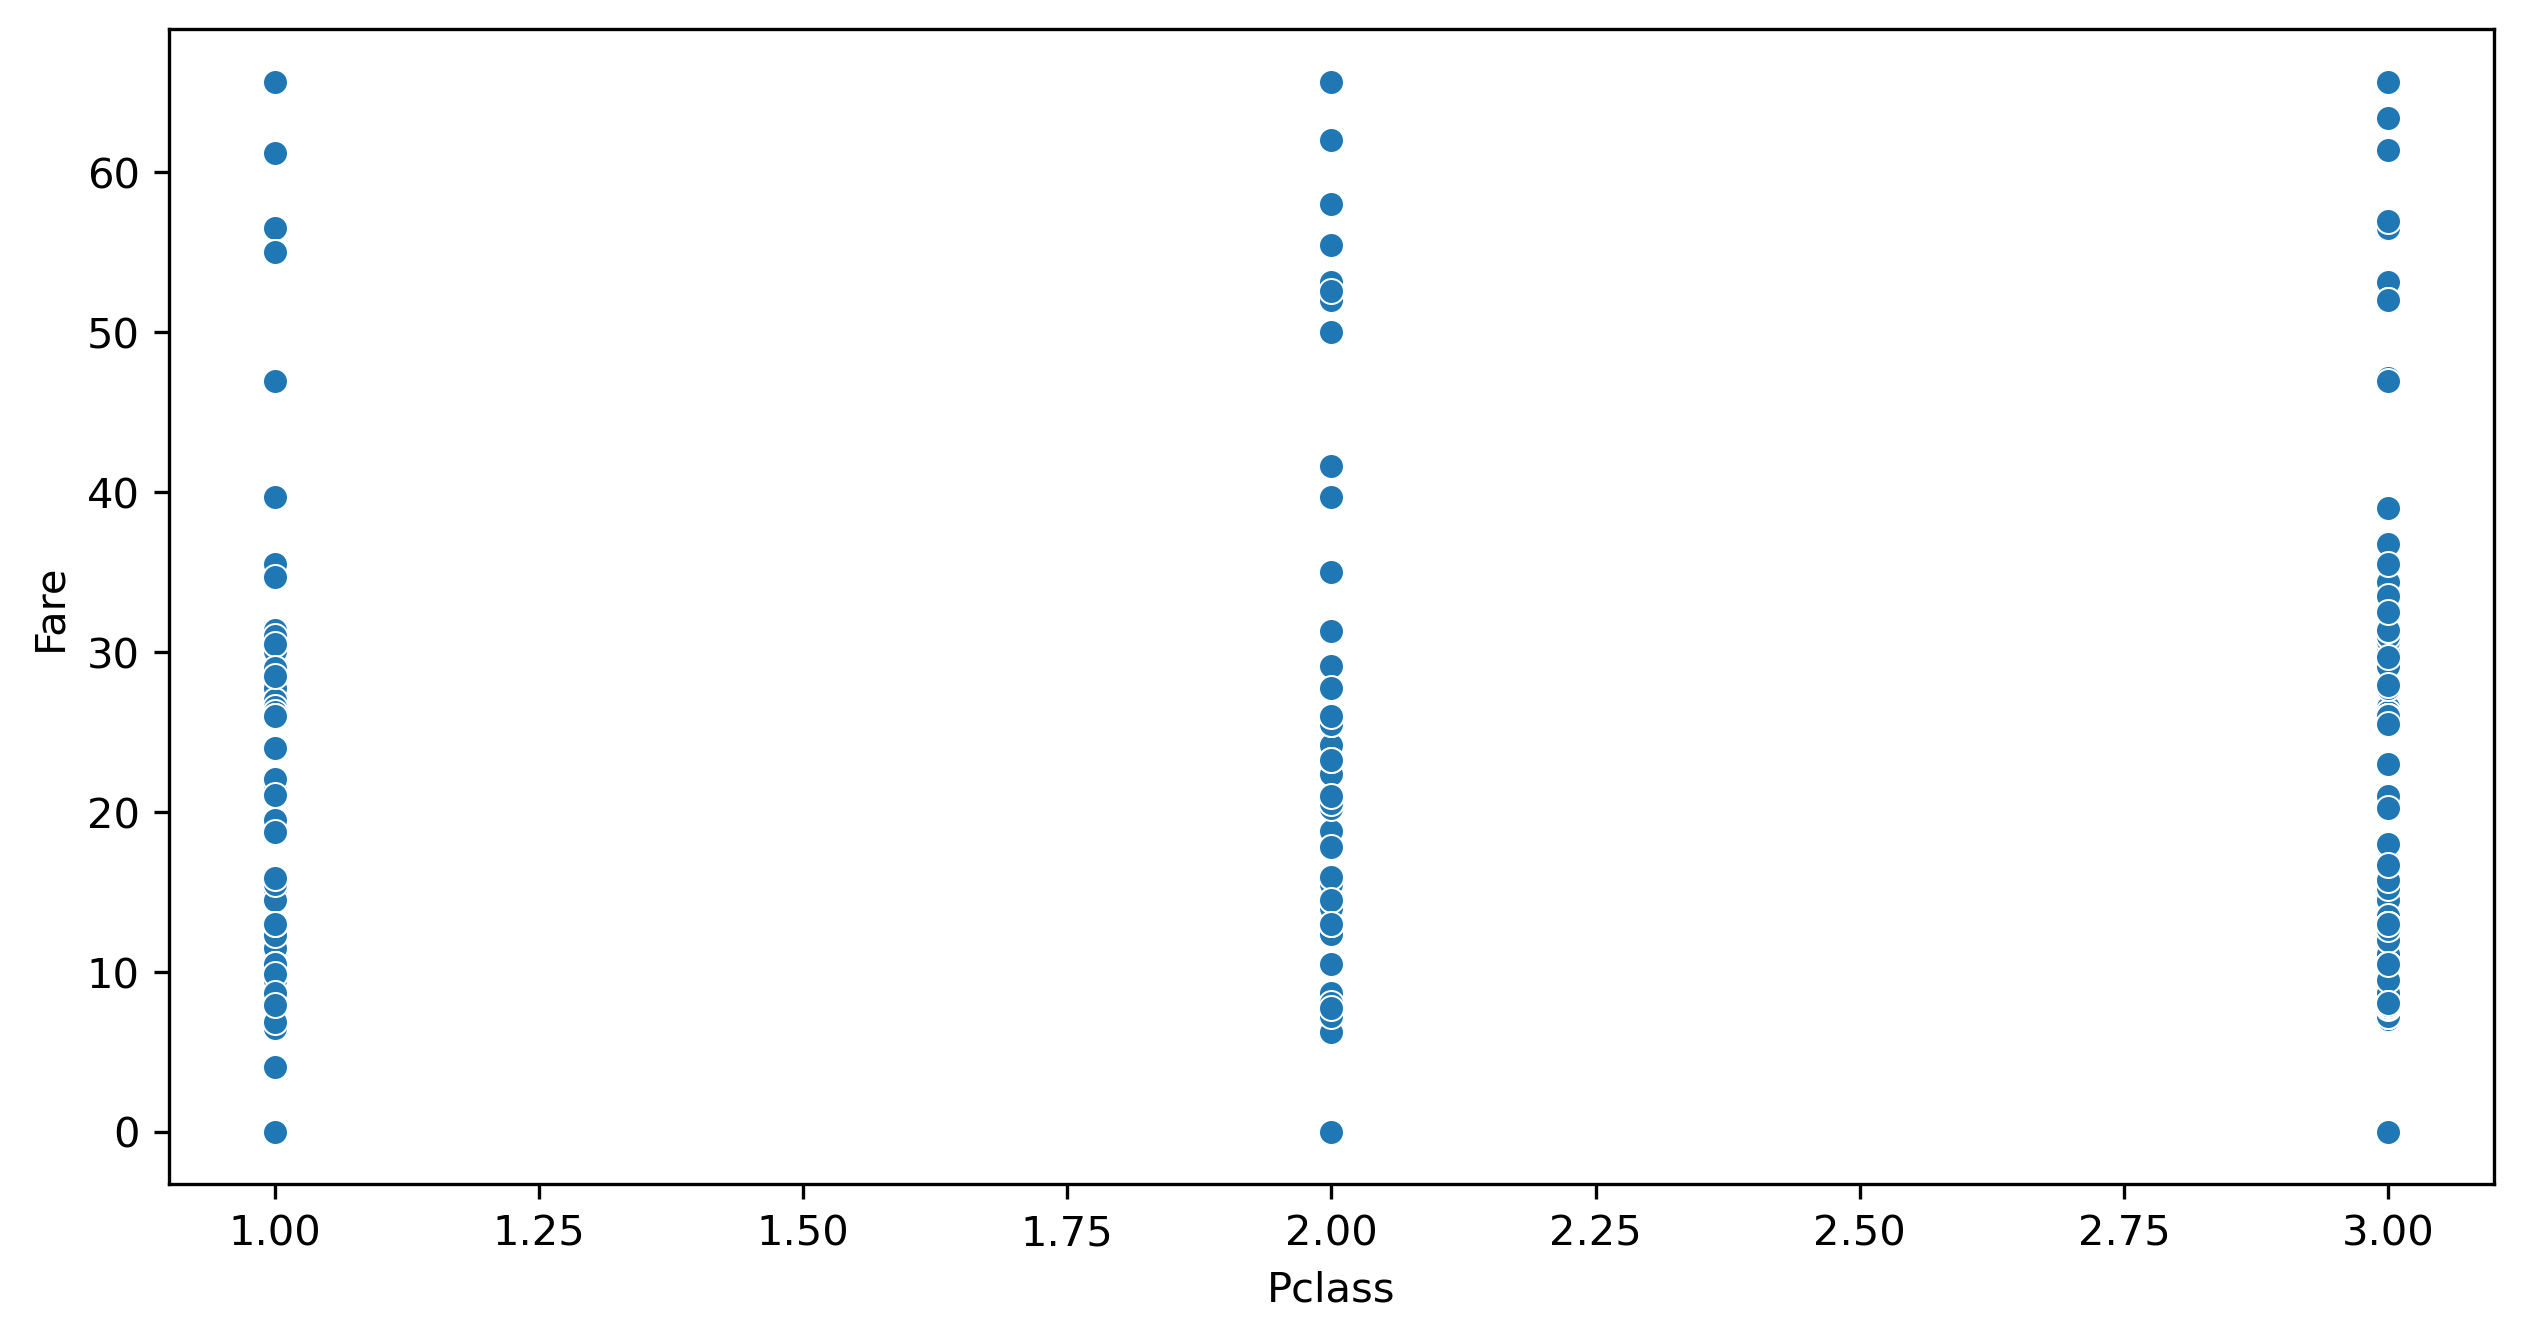

In [94]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

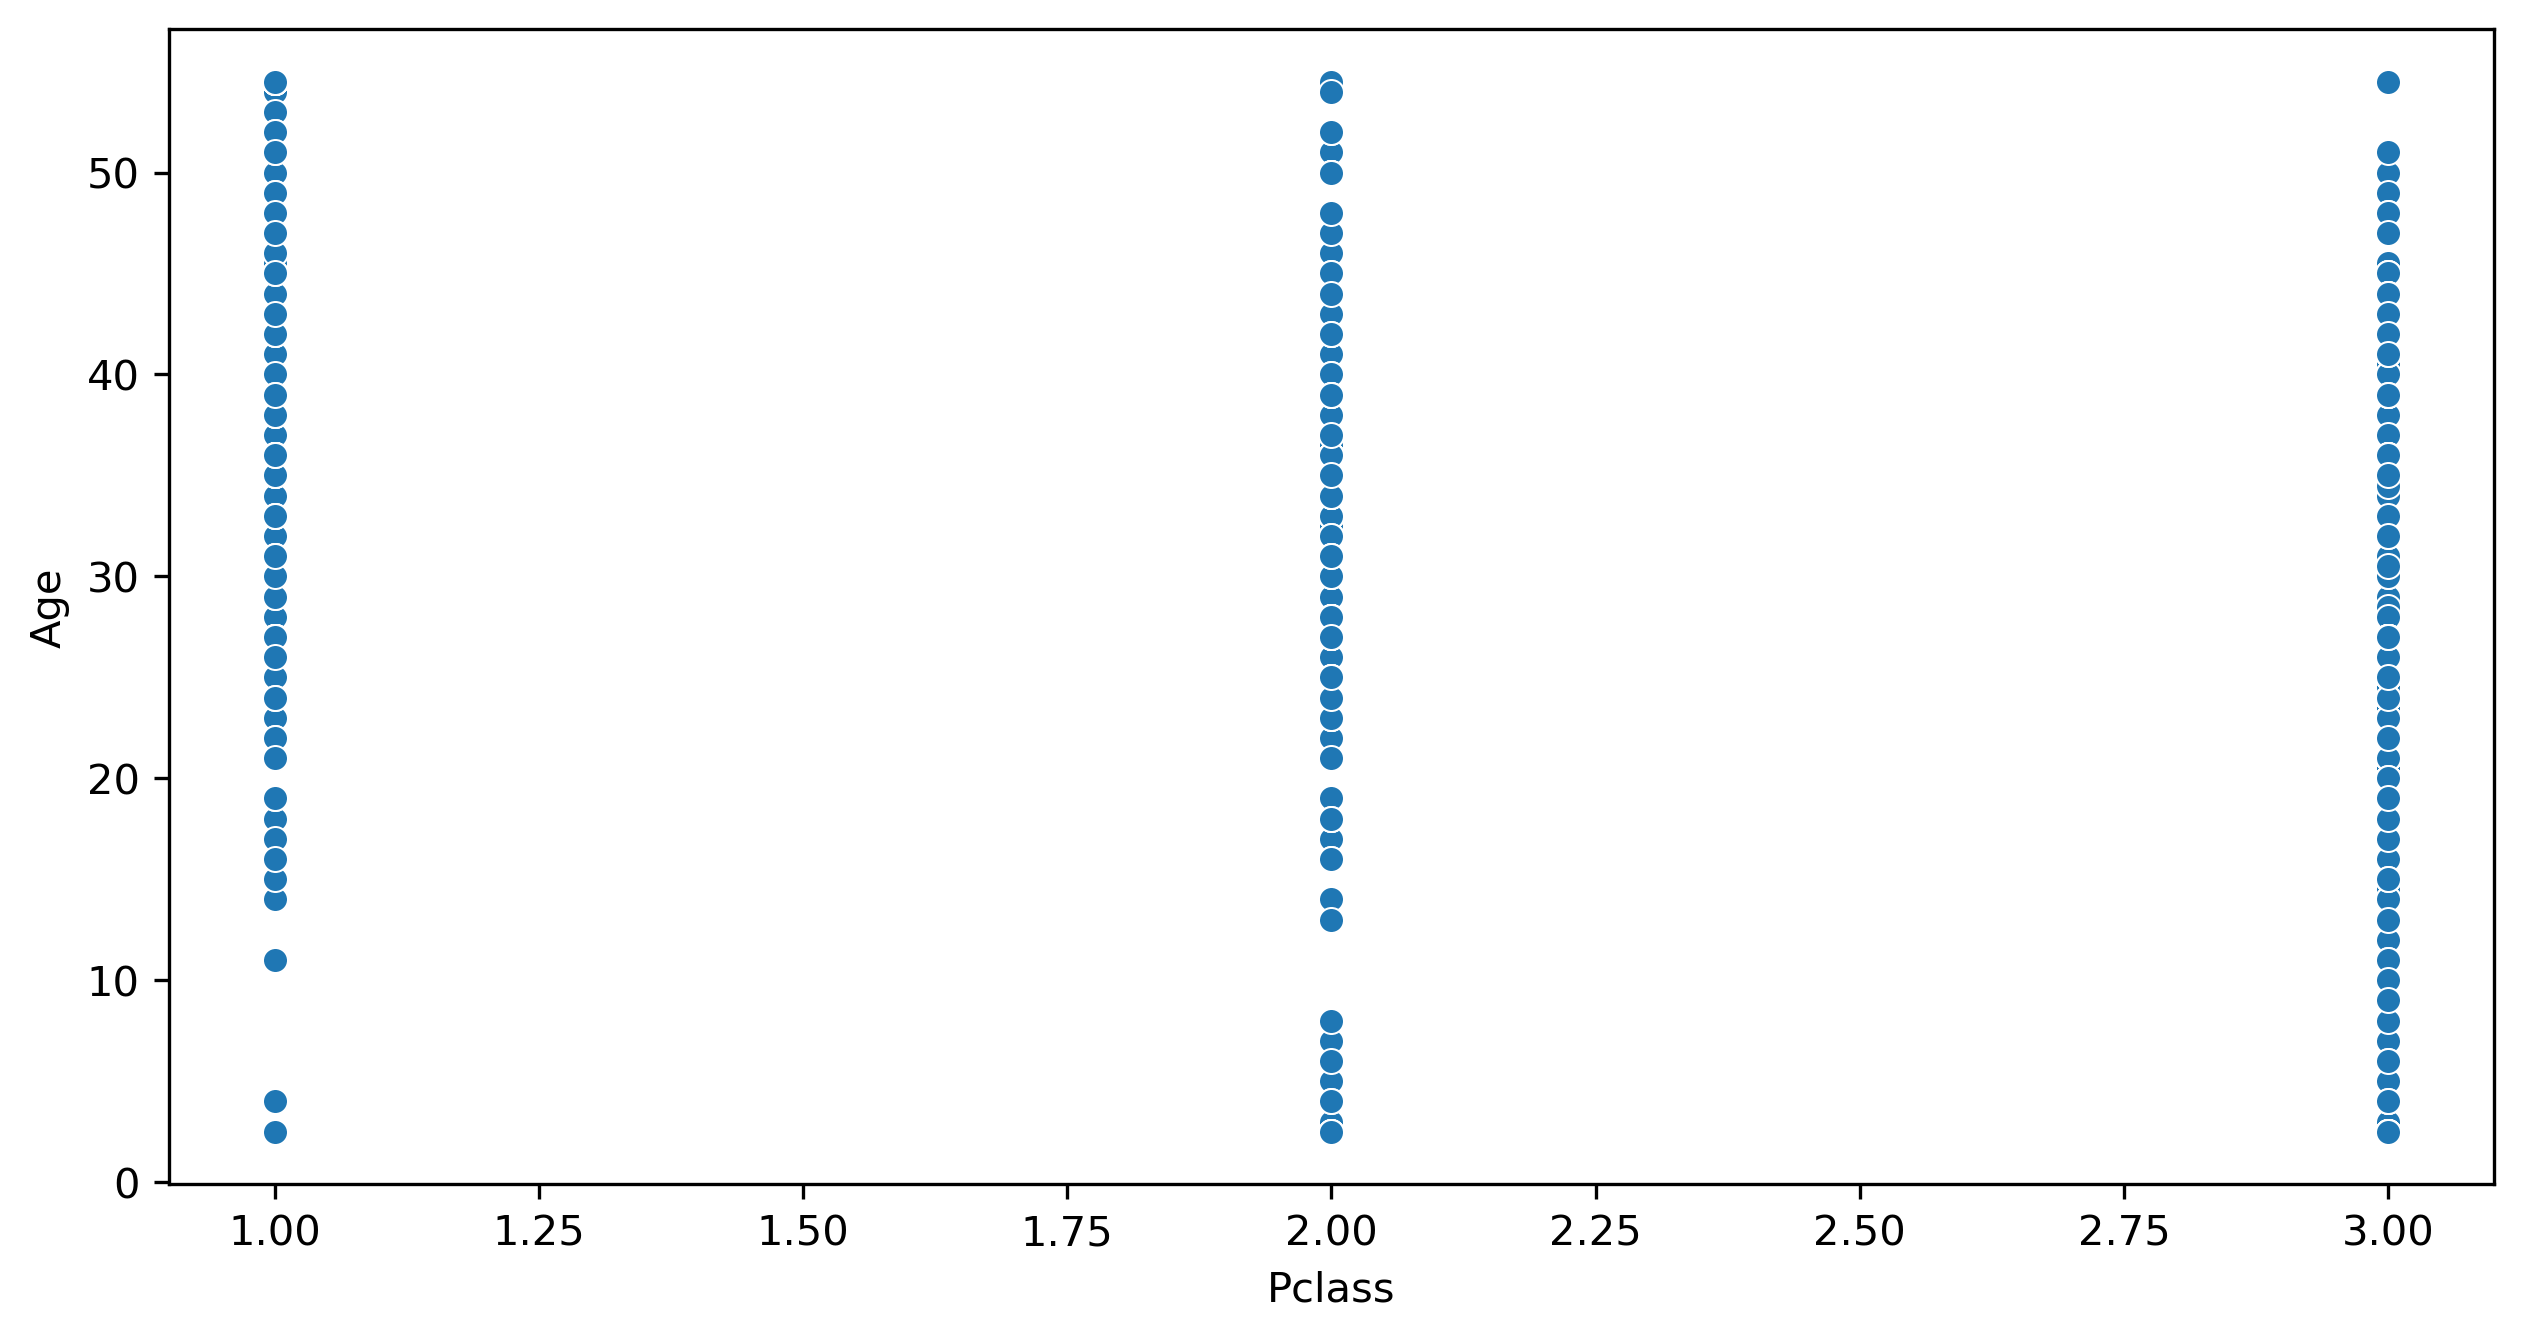

In [95]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

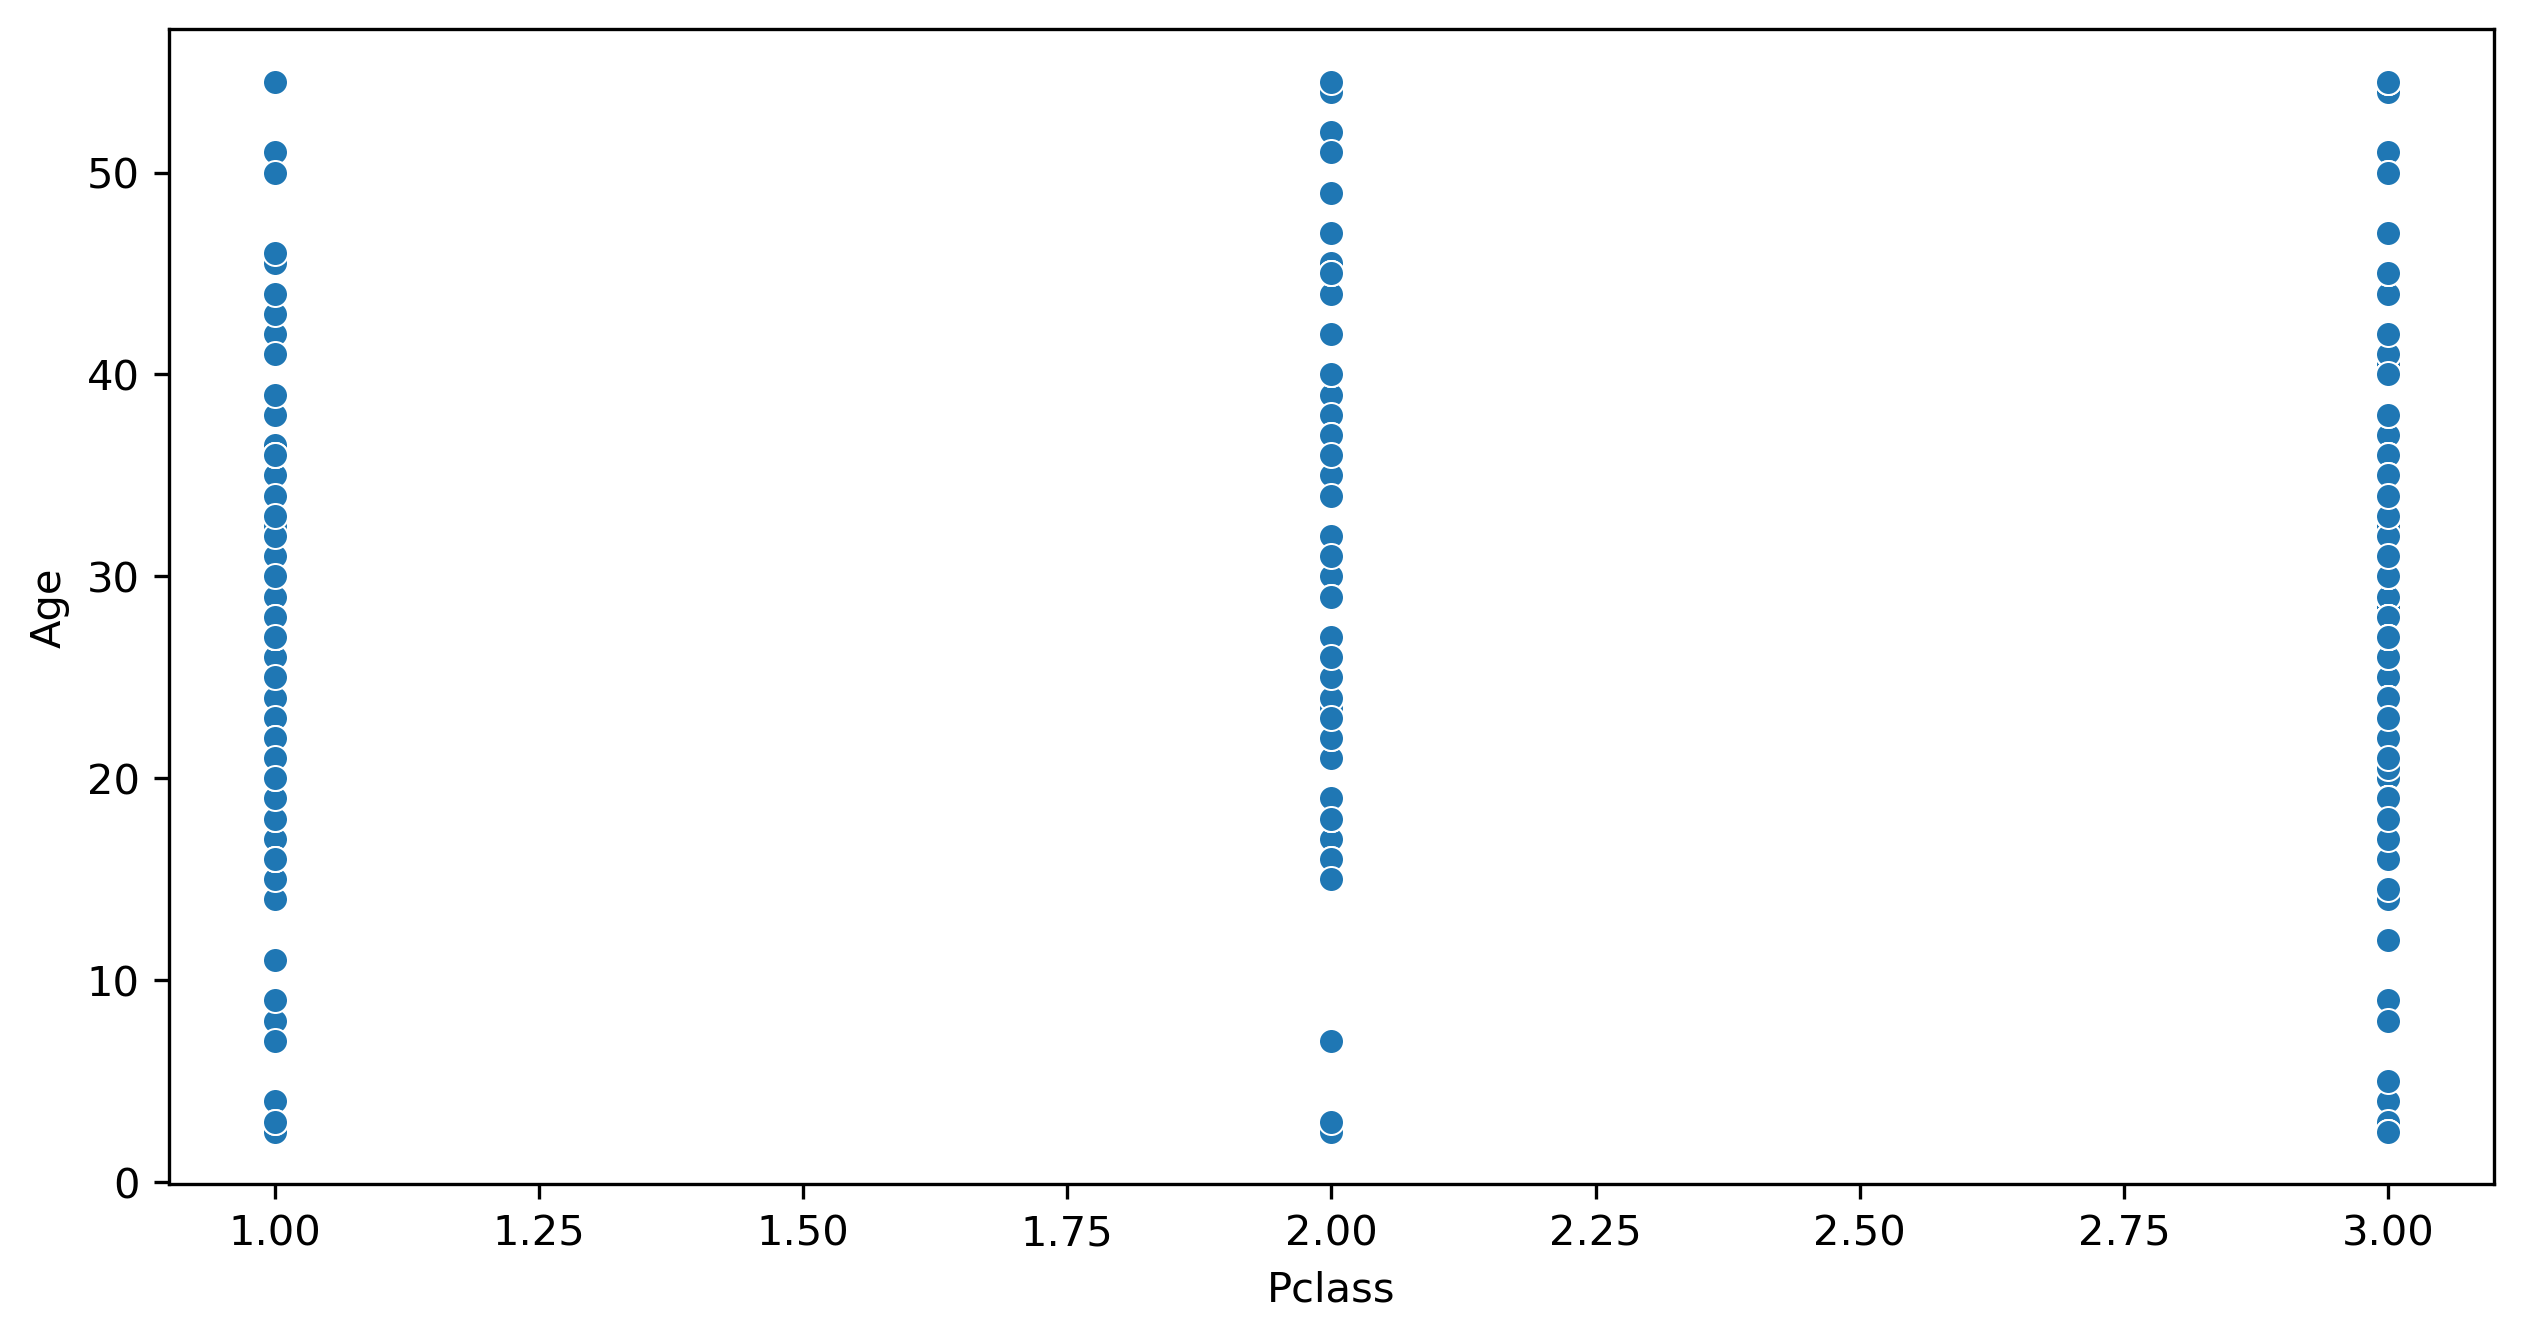

In [96]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Age'])

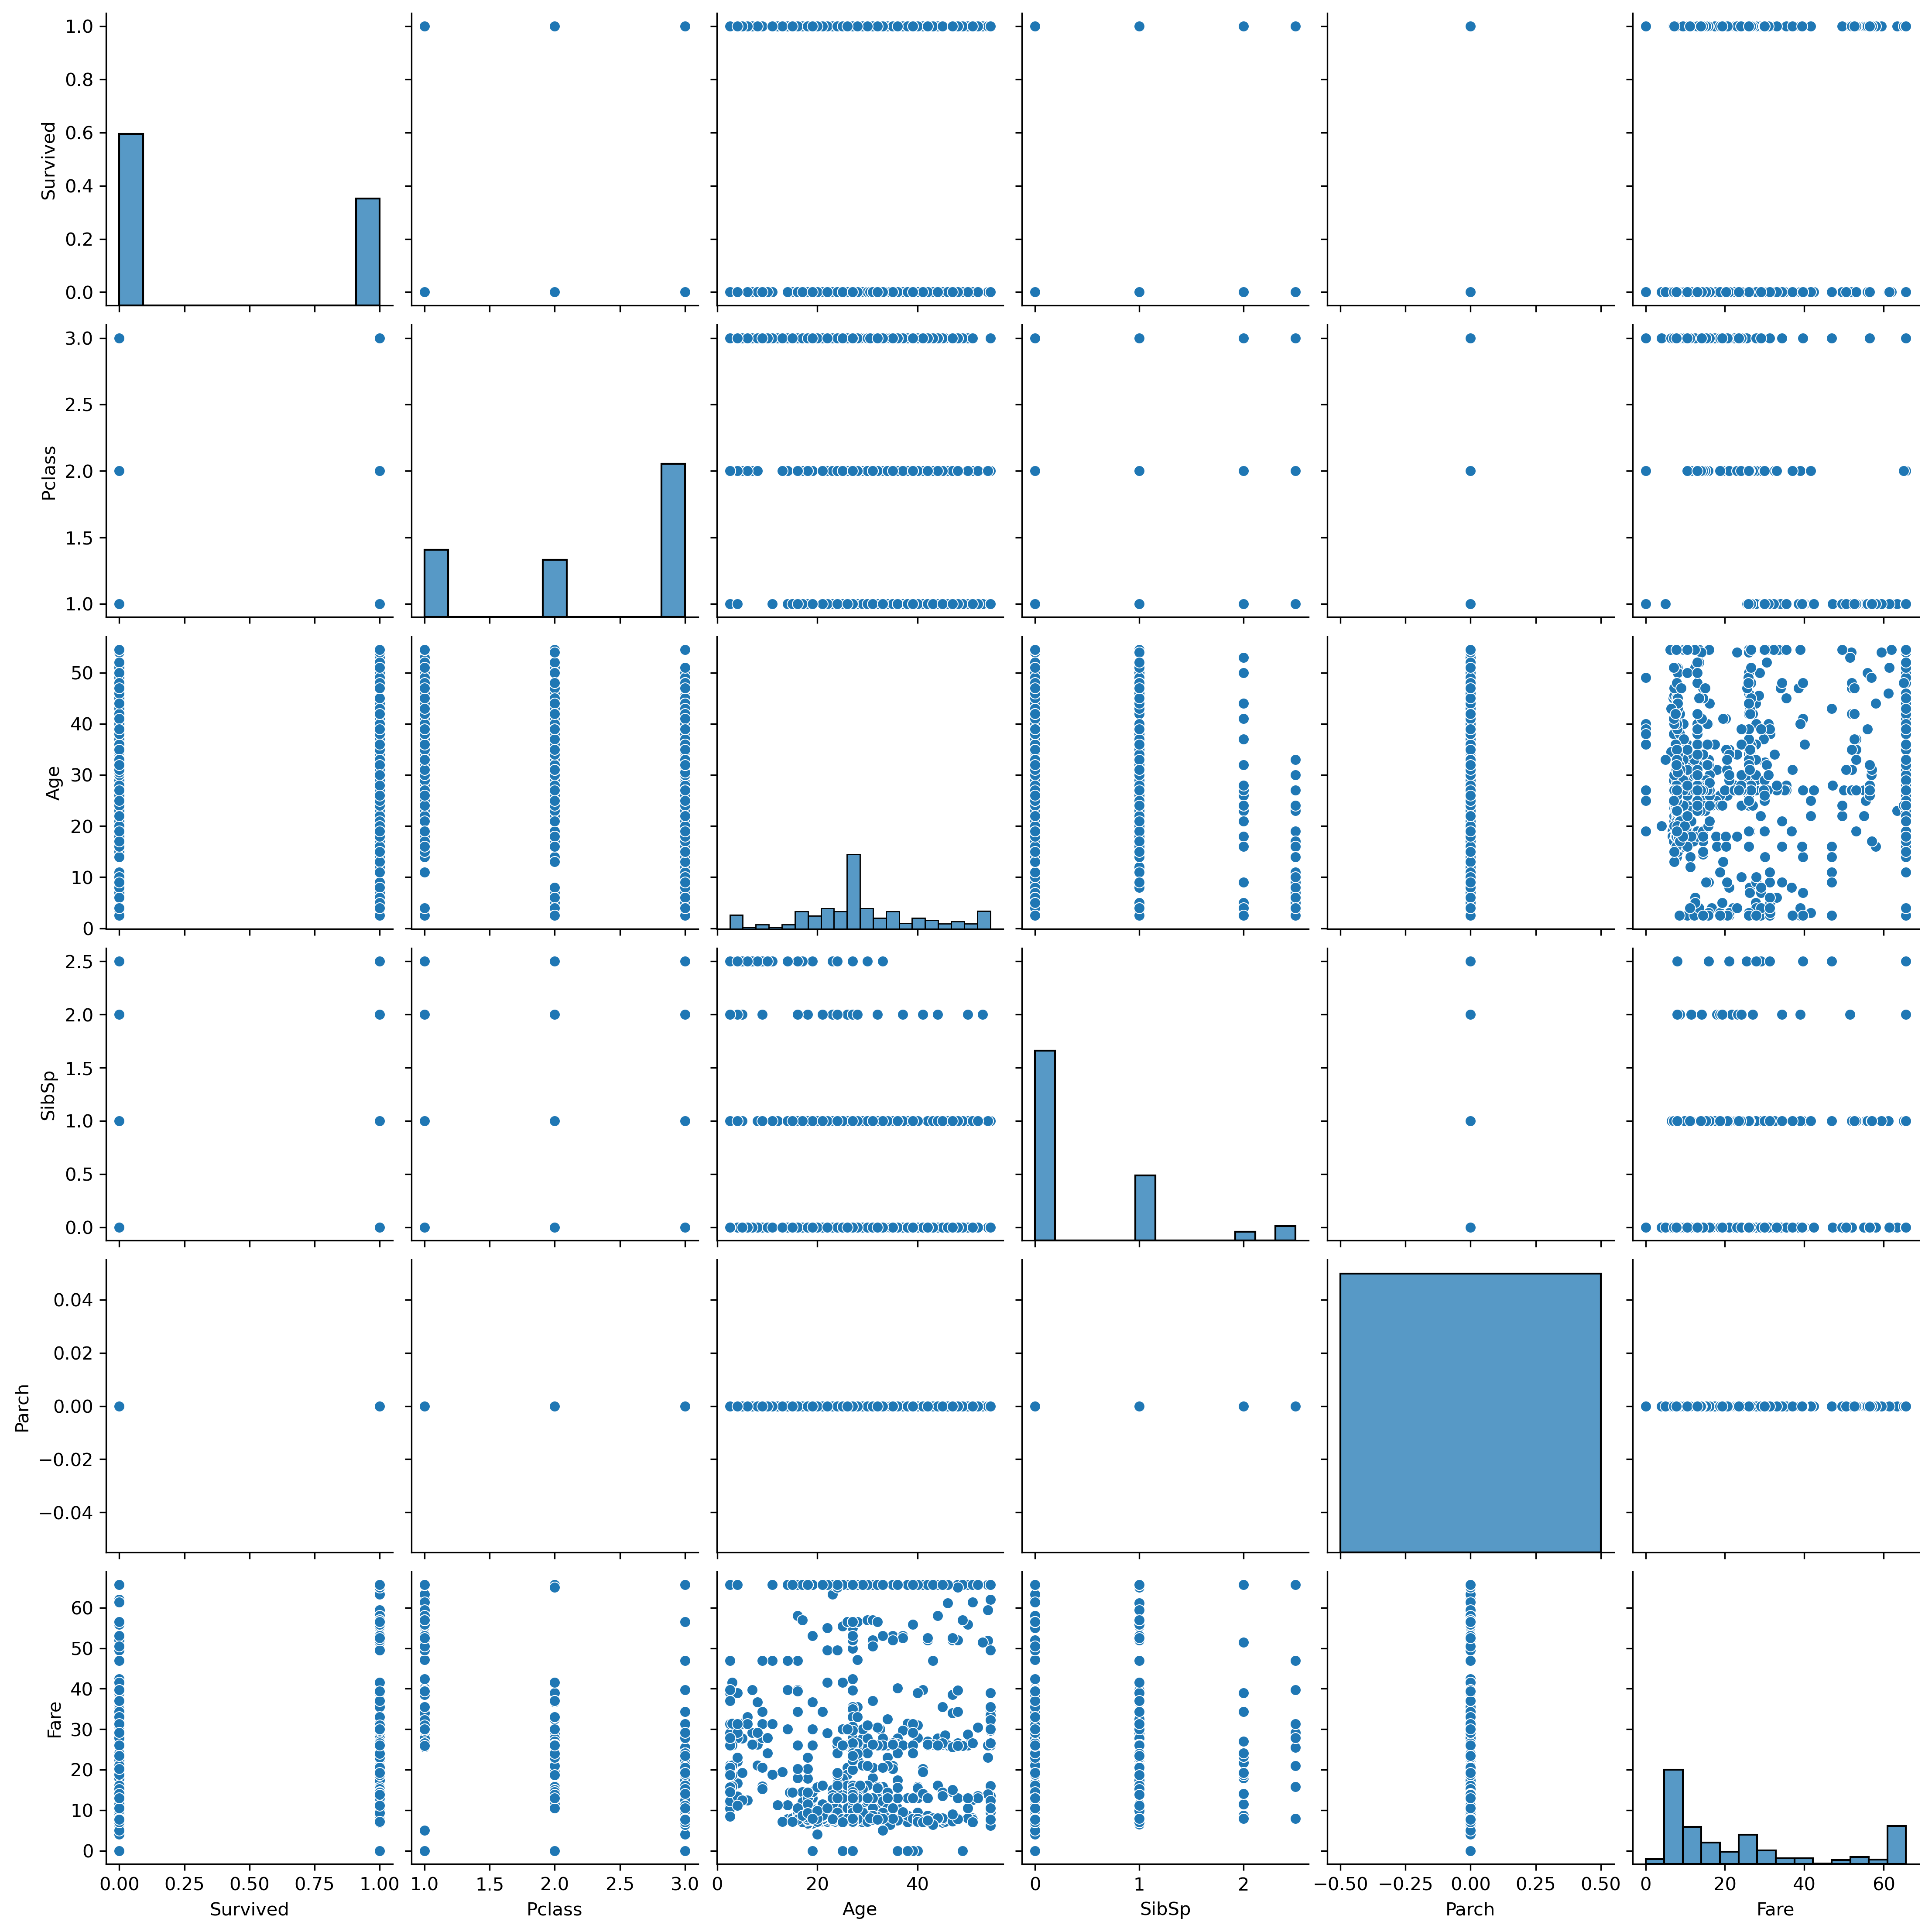

In [97]:
sns.pairplot(titanic_train_data)

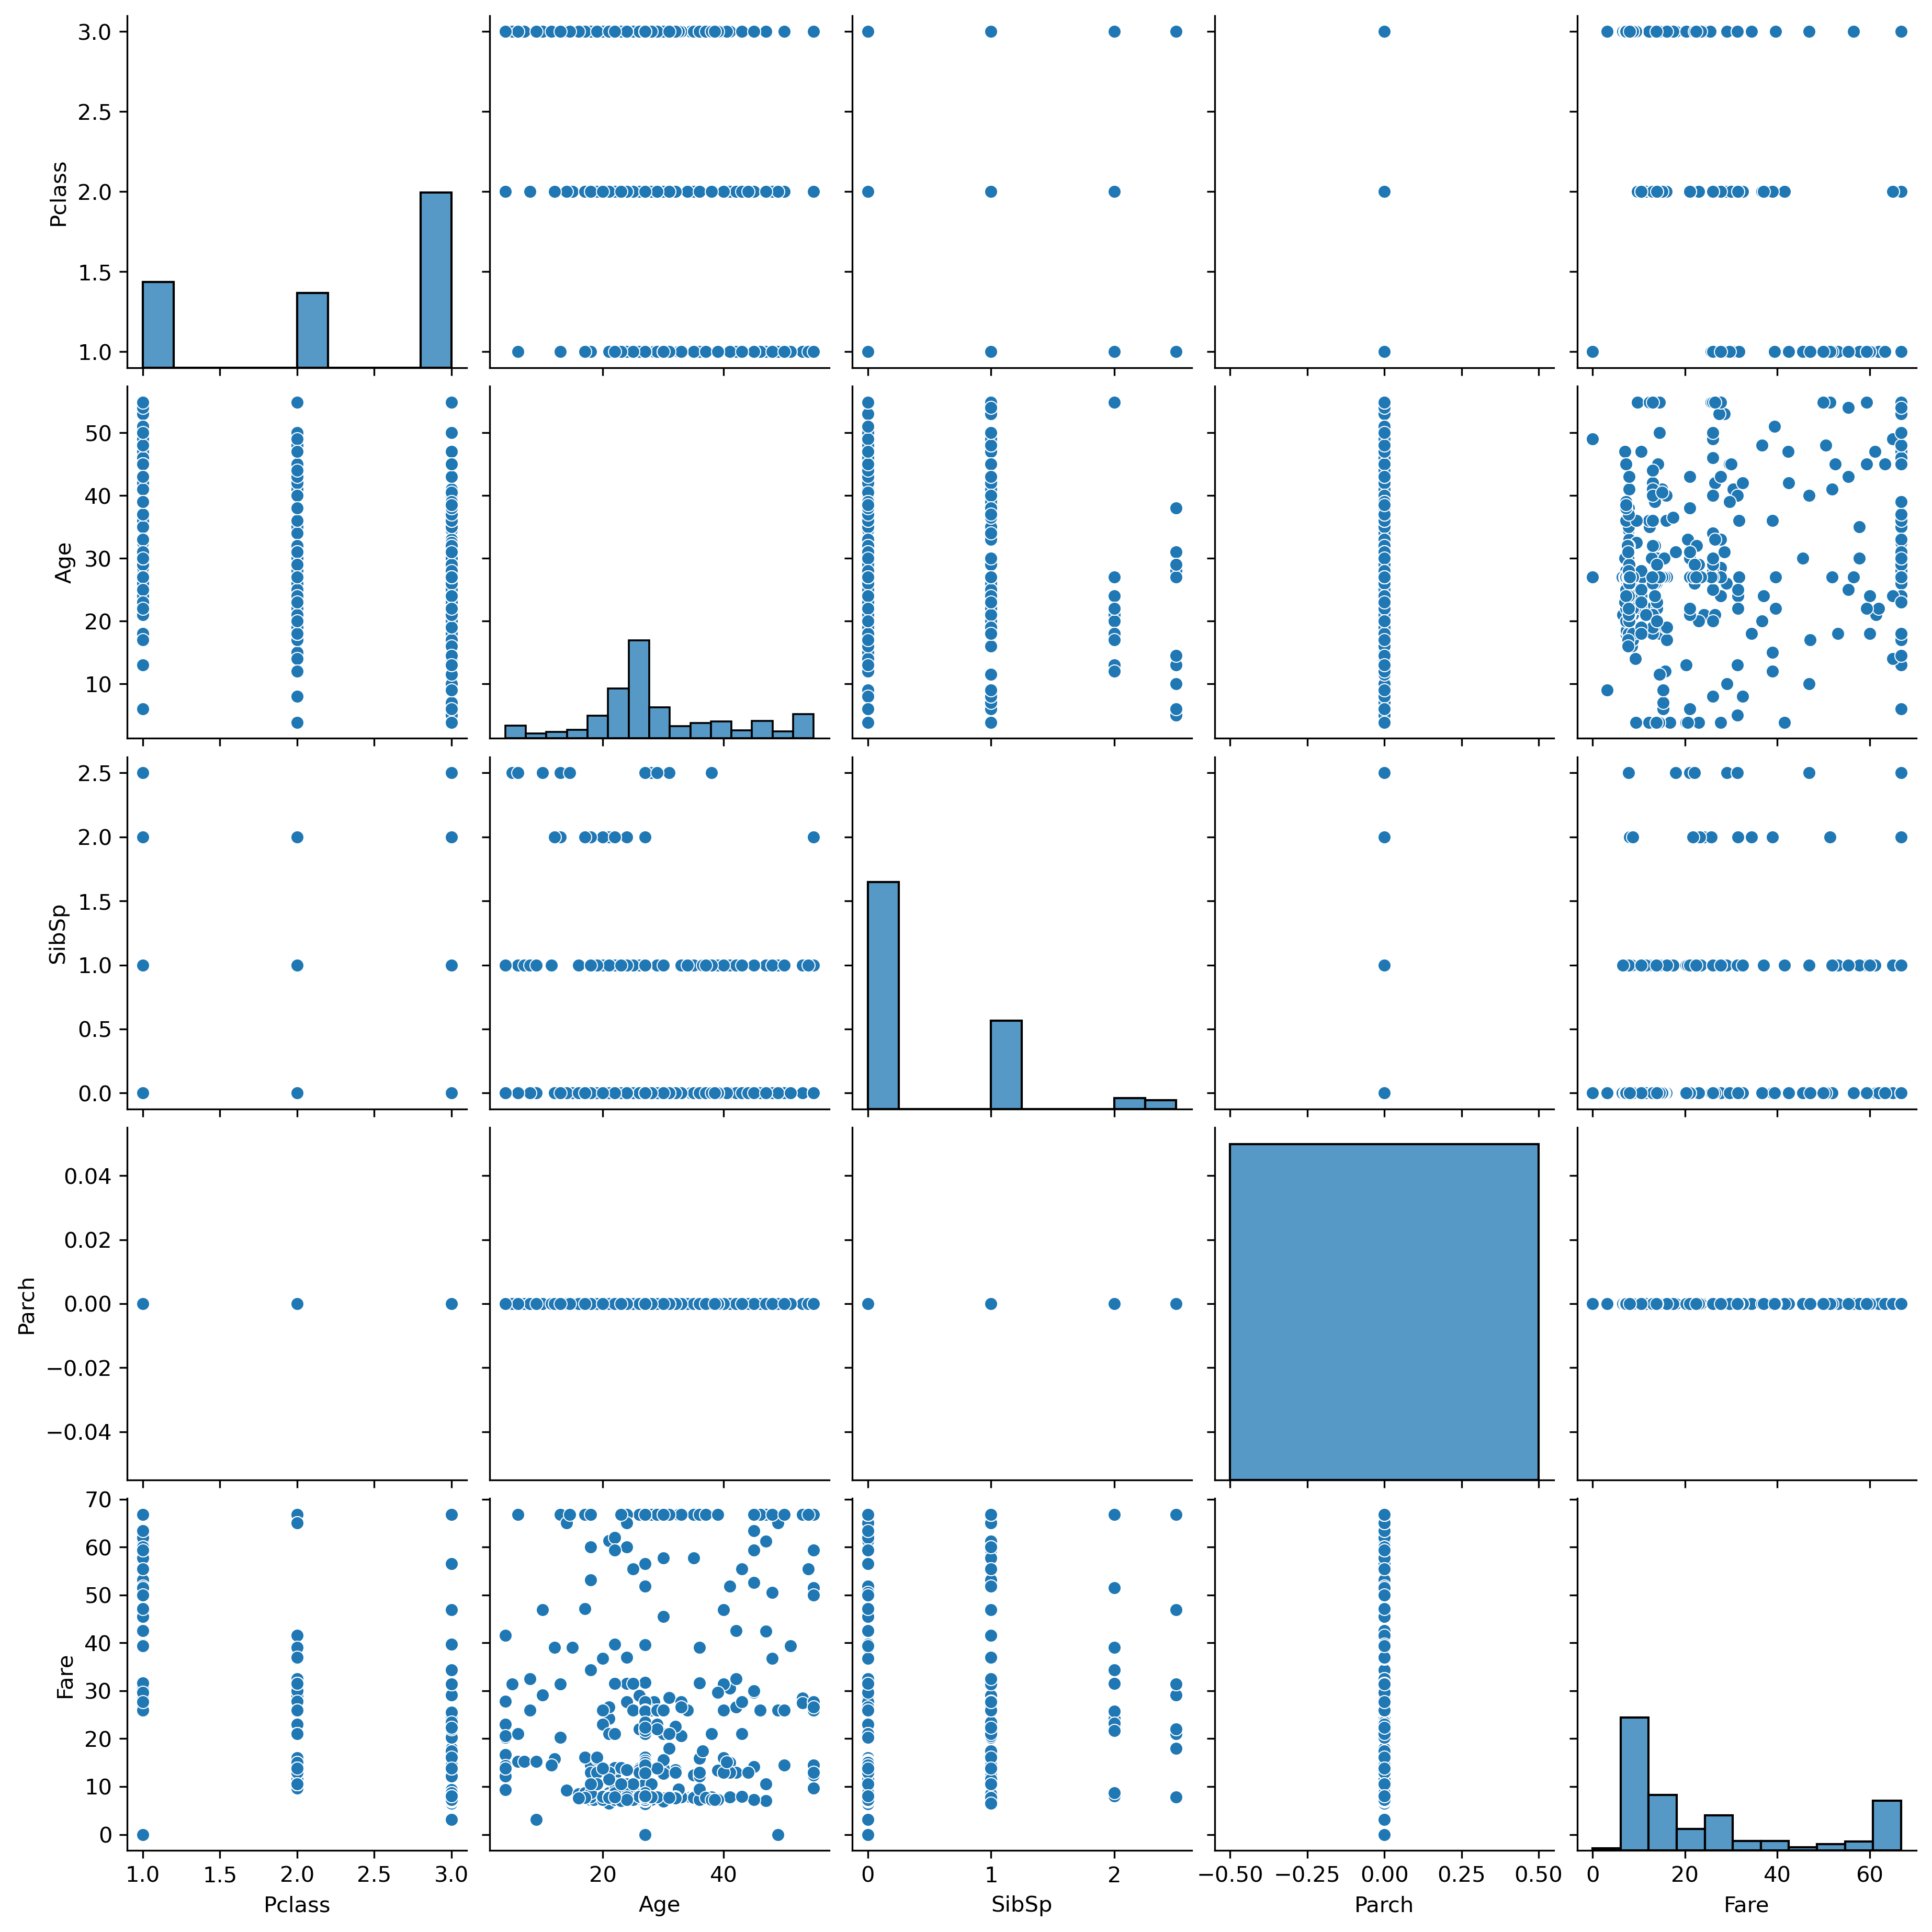

In [98]:
sns.pairplot(titanic_test_data)

In [99]:
#Correlation coefficient
import warnings
warnings.filterwarnings('ignore')
titanic_train_data.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.057461,0.031434,NaN,0.317430
Pclass,-0.338481,1.000000,-0.345444,0.023180,NaN,-0.715300
Age,-0.057461,-0.345444,1.000000,-0.245223,NaN,0.148467
SibSp,0.031434,0.023180,-0.245223,1.000000,NaN,0.349615
Parch,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.317430,-0.715300,0.148467,0.349615,NaN,1.000000


In [100]:
import warnings
warnings.filterwarnings('ignore')
titanic_test_data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.470951,-0.064610,NaN,-0.748755
Age,-0.470951,1.000000,-0.043117,NaN,0.350319
SibSp,-0.064610,-0.043117,1.000000,NaN,0.331912
Parch,NaN,NaN,NaN,NaN,NaN
Fare,-0.748755,0.350319,0.331912,NaN,1.000000


<Axes: >

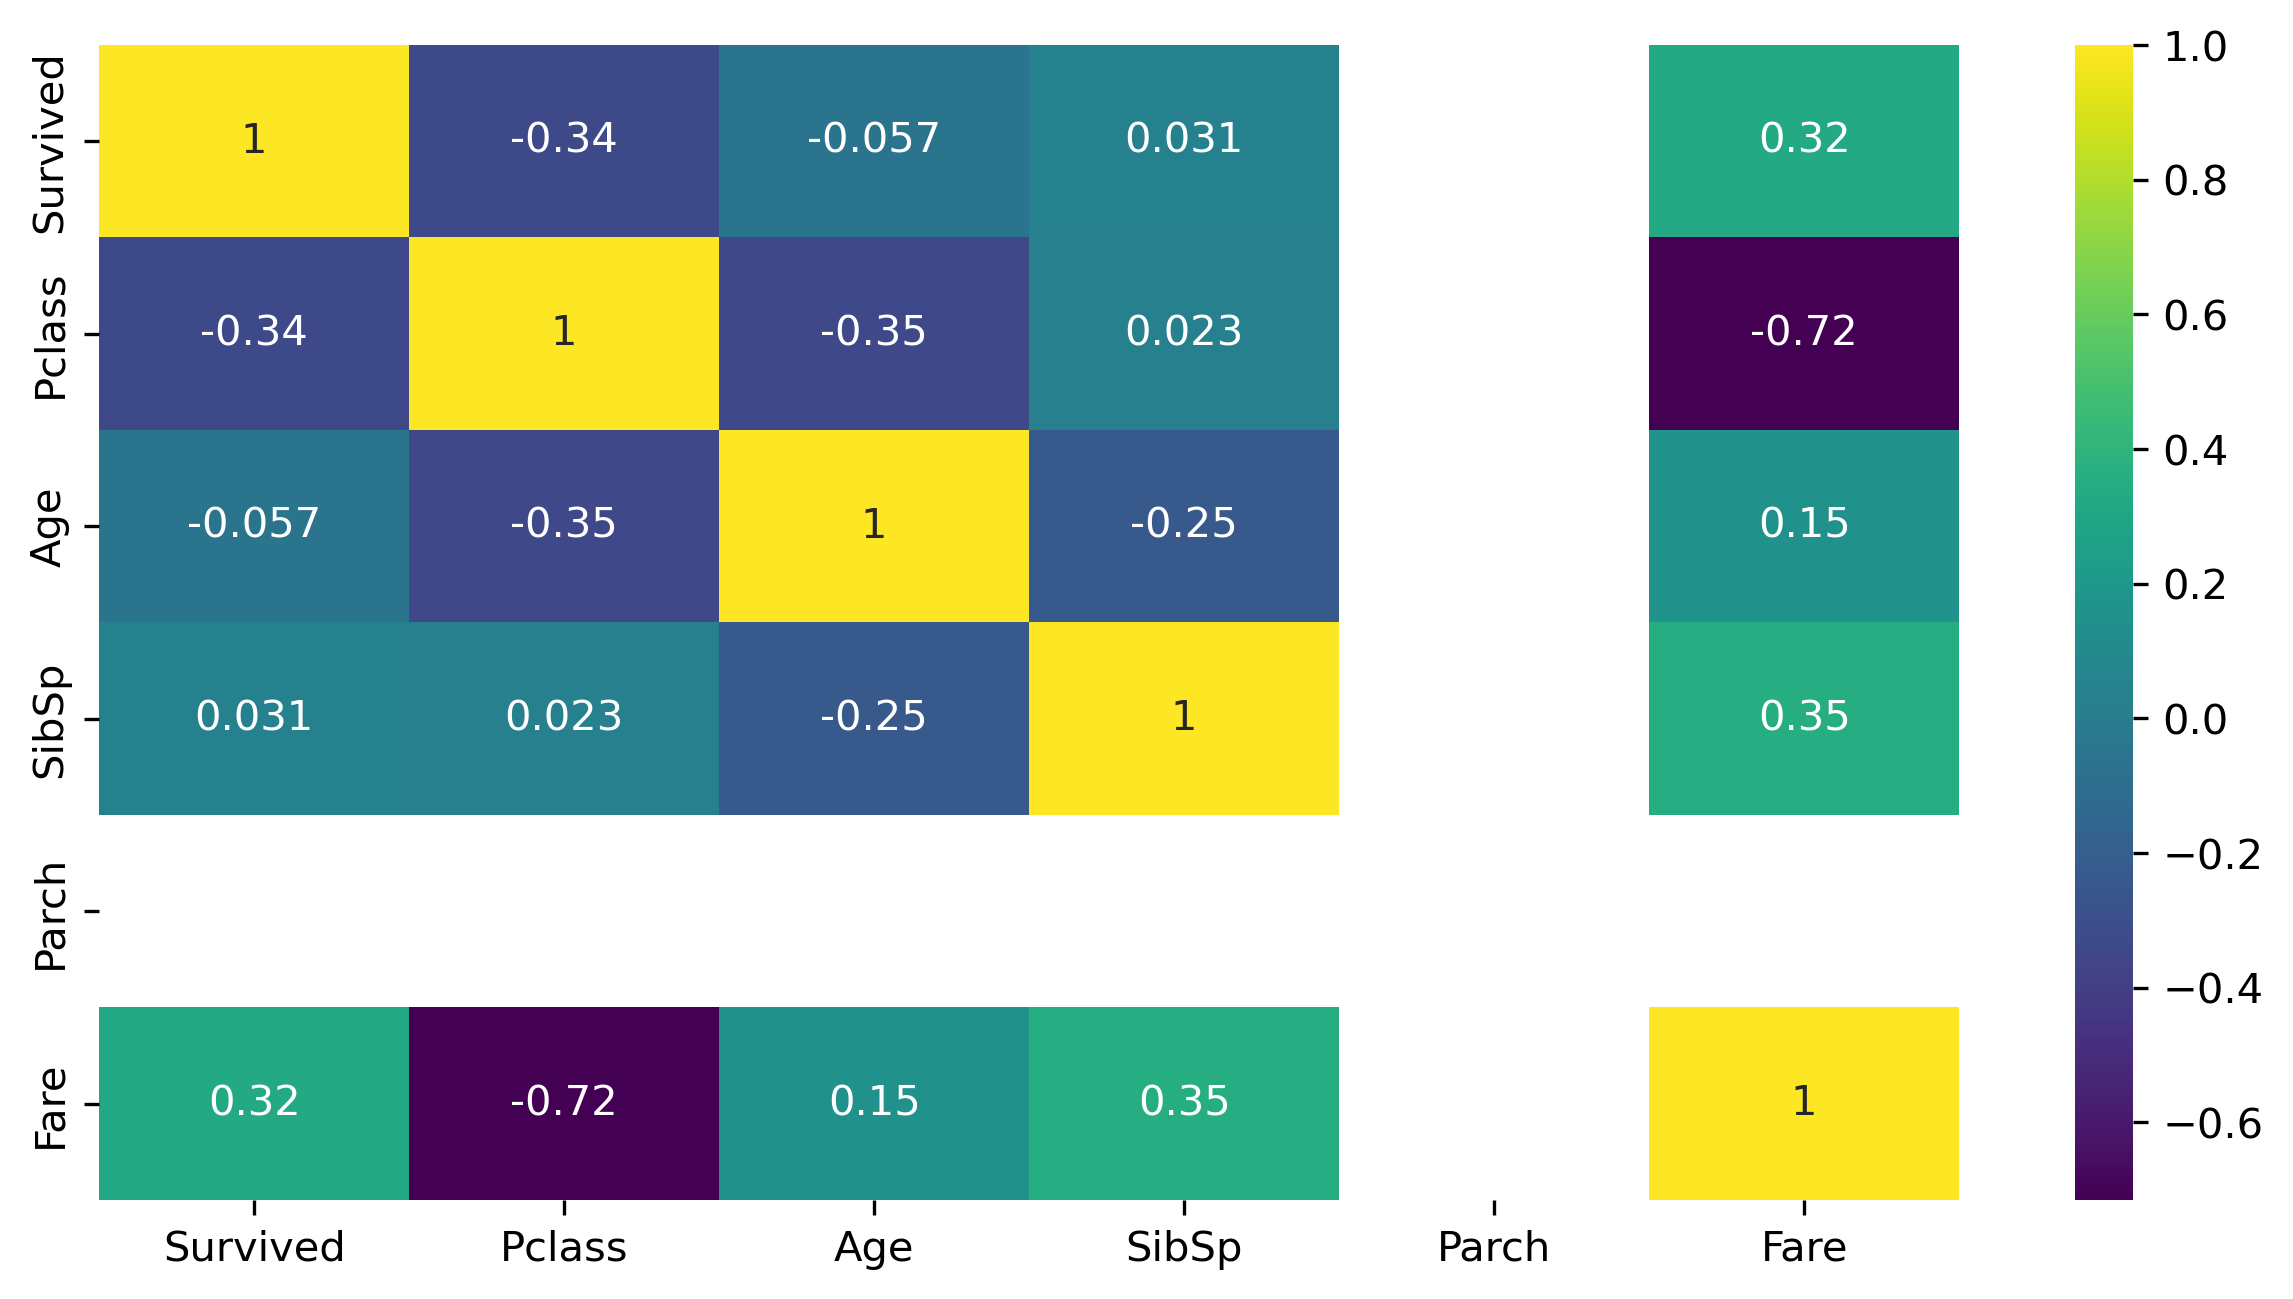

In [101]:
sns.heatmap(titanic_train_data.corr(numeric_only=True), annot=True, cmap='viridis')

<Axes: >

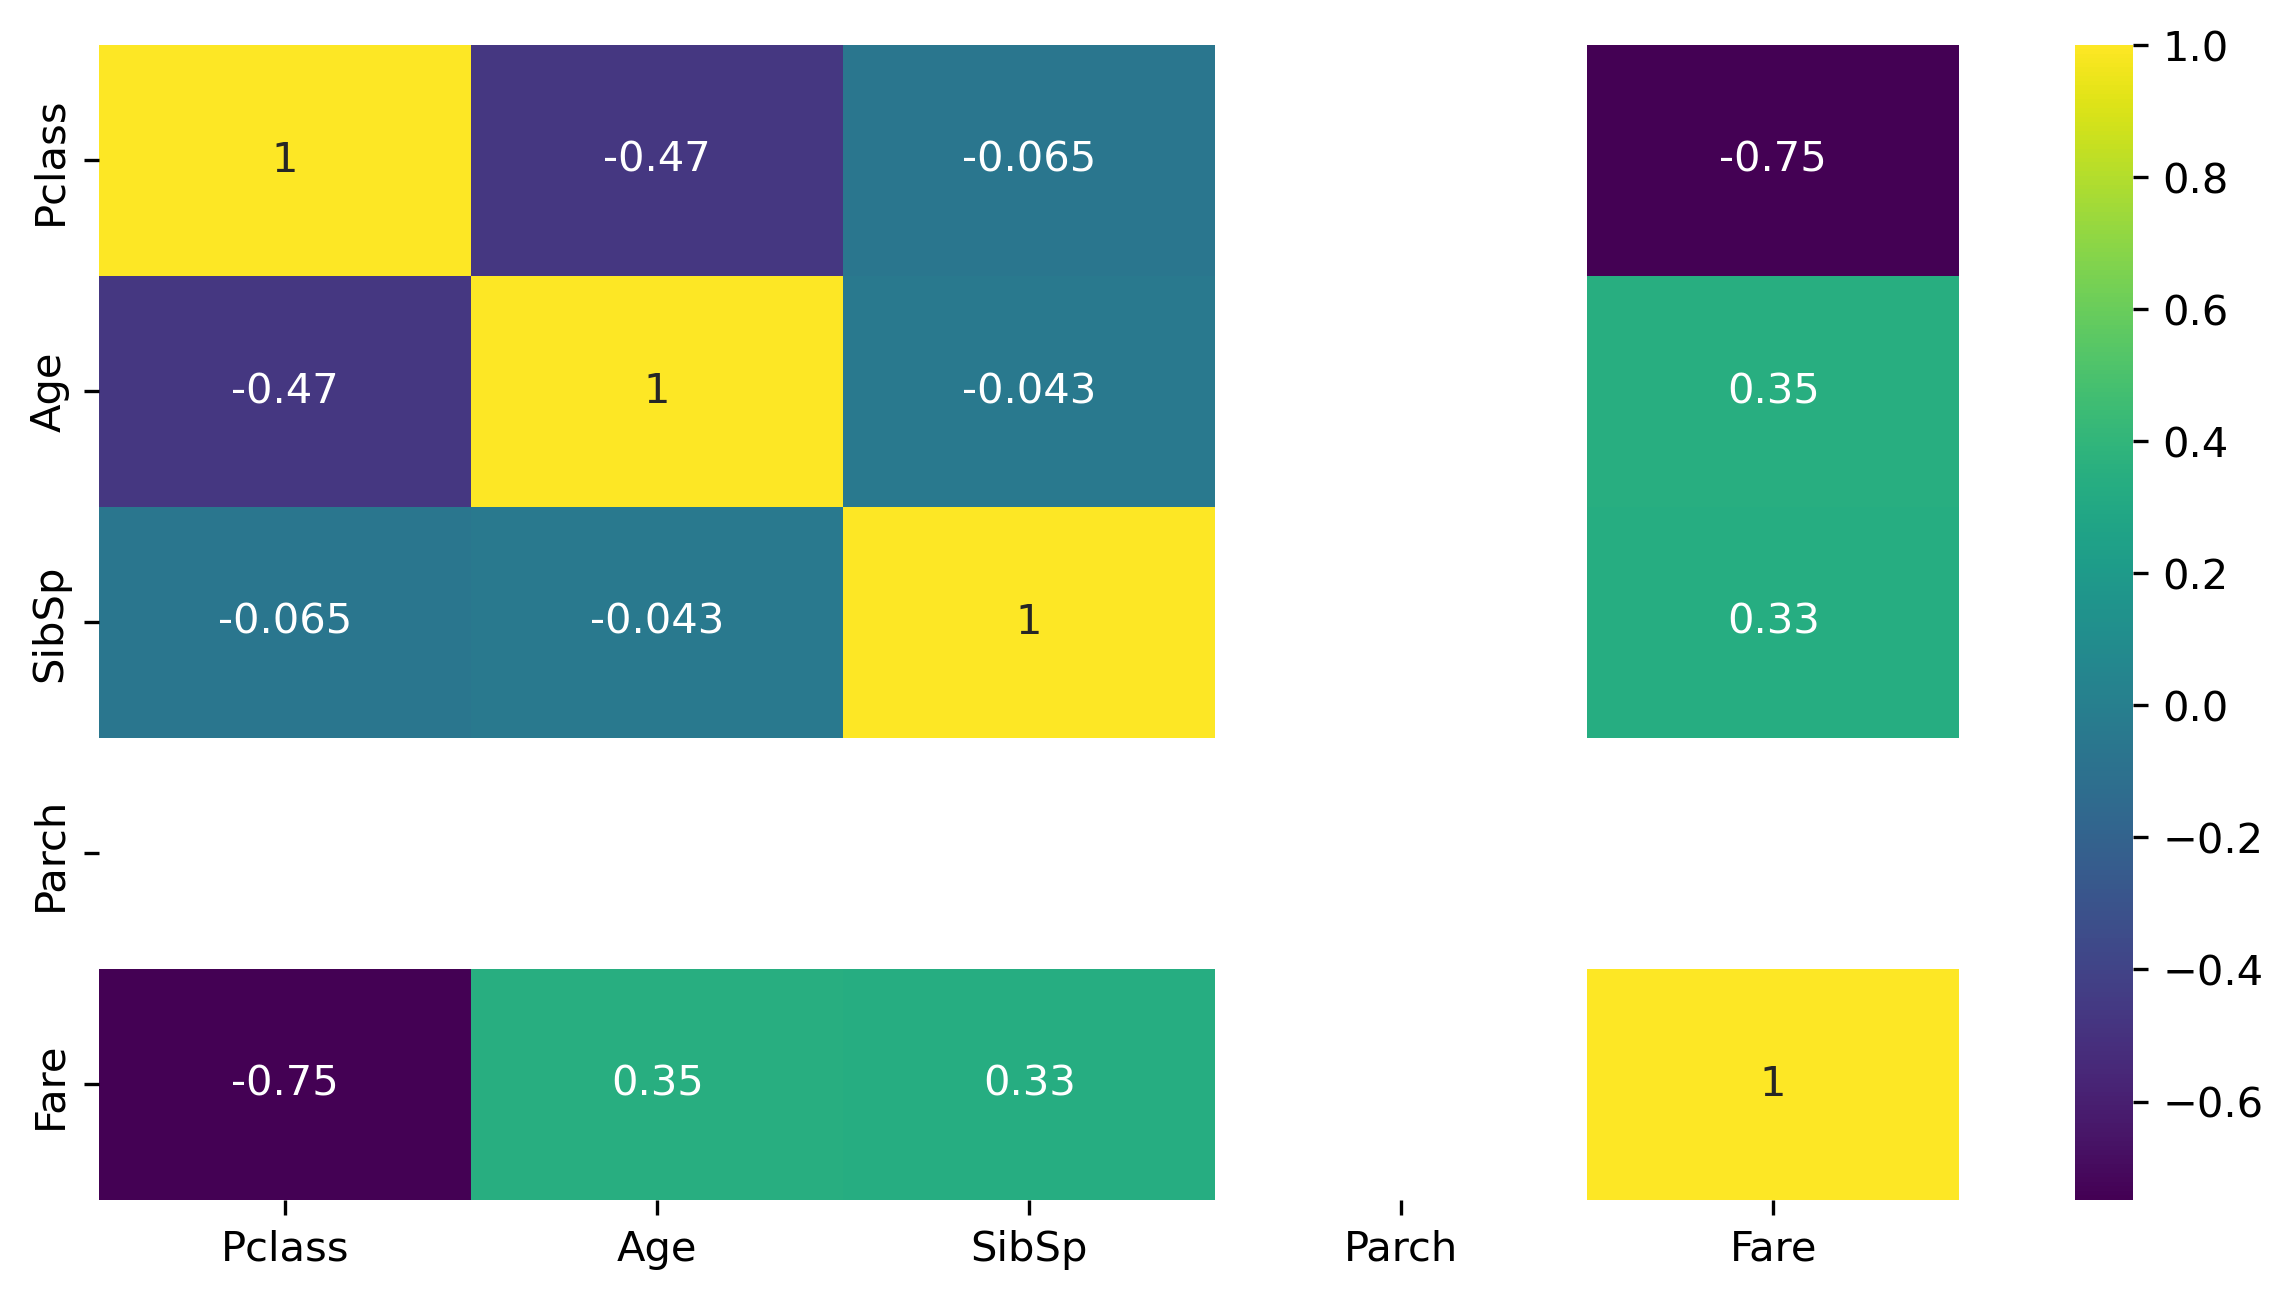

In [103]:
sns.heatmap(titanic_test_data.corr(numeric_only=True), annot=True, cmap='viridis')

In [104]:
titanic_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,65.6344,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S
888,0.0,3.0,female,27.0,1.0,0.0,23.4500,S
889,1.0,1.0,male,26.0,0.0,0.0,30.0000,C


In [105]:
titanic_test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,34.500,0.0,0.0,7.829200,Q
1,3.0,female,47.000,1.0,0.0,7.000000,S
2,2.0,male,54.875,0.0,0.0,9.687500,Q
3,3.0,male,27.000,0.0,0.0,8.662500,S
4,3.0,female,22.000,1.0,0.0,12.287500,S
...,...,...,...,...,...,...,...
413,3.0,male,27.000,0.0,0.0,8.050000,S
414,1.0,female,39.000,0.0,0.0,66.835988,C
415,3.0,male,38.500,0.0,0.0,7.250000,S
416,3.0,male,27.000,0.0,0.0,8.050000,S


In [106]:
#Data preprocessing
##Encoding using pandas dummy function.
titanic_train_data=pd.get_dummies(data=titanic_train_data, columns= ['Sex','Embarked'])
titanic_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,1.0,1.0,38.0,1.0,0.0,65.6344,1,0,1,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,1,0,0,0,1
4,0.0,3.0,35.0,0.0,0.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,0,1,0,0,1
887,1.0,1.0,19.0,0.0,0.0,30.0000,1,0,0,0,1
888,0.0,3.0,27.0,1.0,0.0,23.4500,1,0,0,0,1
889,1.0,1.0,26.0,0.0,0.0,30.0000,0,1,1,0,0


In [108]:
titanic_test_data=pd.get_dummies(data=titanic_test_data, columns= ['Sex','Embarked'])
titanic_test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.500,0.0,0.0,7.829200,0,1,0,1,0
1,3.0,47.000,1.0,0.0,7.000000,1,0,0,0,1
2,2.0,54.875,0.0,0.0,9.687500,0,1,0,1,0
3,3.0,27.000,0.0,0.0,8.662500,0,1,0,0,1
4,3.0,22.000,1.0,0.0,12.287500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3.0,27.000,0.0,0.0,8.050000,0,1,0,0,1
414,1.0,39.000,0.0,0.0,66.835988,1,0,1,0,0
415,3.0,38.500,0.0,0.0,7.250000,0,1,0,0,1
416,3.0,27.000,0.0,0.0,8.050000,0,1,0,0,1


In [109]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [110]:
titanic_test_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [111]:
#3. Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.
#Define x and y
titanic_train_data.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,1.0,1.0,38.0,1.0,0.0,65.6344,1,0,1,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,1,0,0,0,1


In [115]:
x =titanic_train_data .iloc[:,1:]
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,0,1,0,0,1
1,1.0,38.0,1.0,0.0,65.6344,1,0,1,0,0
2,3.0,26.0,0.0,0.0,7.9250,1,0,0,0,1
3,1.0,35.0,1.0,0.0,53.1000,1,0,0,0,1
4,3.0,35.0,0.0,0.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,0,1,0,0,1
887,1.0,19.0,0.0,0.0,30.0000,1,0,0,0,1
888,3.0,27.0,1.0,0.0,23.4500,1,0,0,0,1
889,1.0,26.0,0.0,0.0,30.0000,0,1,1,0,0


In [116]:
y = titanic_train_data['Survived']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [119]:
#Split the data.
from sklearn.model_selection import train_test_split
train_test_split(x,y,train_size=0.8)

[     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
 234     2.0  24.0    0.0    0.0  10.5000           0         1           0   
 114     3.0  17.0    0.0    0.0  14.4583           1         0           1   
 628     3.0  26.0    0.0    0.0   7.8958           0         1           0   
 529     2.0  23.0    2.0    0.0  11.5000           0         1           0   
 879     1.0  54.5    0.0    0.0  65.6344           1         0           1   
 ..      ...   ...    ...    ...      ...         ...       ...         ...   
 38      3.0  18.0    2.0    0.0  18.0000           1         0           0   
 108     3.0  38.0    0.0    0.0   7.8958           0         1           0   
 195     1.0  54.5    0.0    0.0  65.6344           1         0           1   
 45      3.0  27.0    0.0    0.0   8.0500           0         1           0   
 215     1.0  31.0    1.0    0.0  65.6344           1         0           1   
 
      Embarked_Q  Embarked_S  
 234           0   

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
lg = LogisticRegression() 
lg.fit(xtrain,ytrain) 

LogisticRegression()

In [123]:
ypred = lg.predict(xtest)
ypred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1.])

In [125]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0.]
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0.]


In [124]:
len(ypred)

179

In [131]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score,roc_curve

In [132]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[87, 18],
       [20, 54]], dtype=int64)

<Axes: >

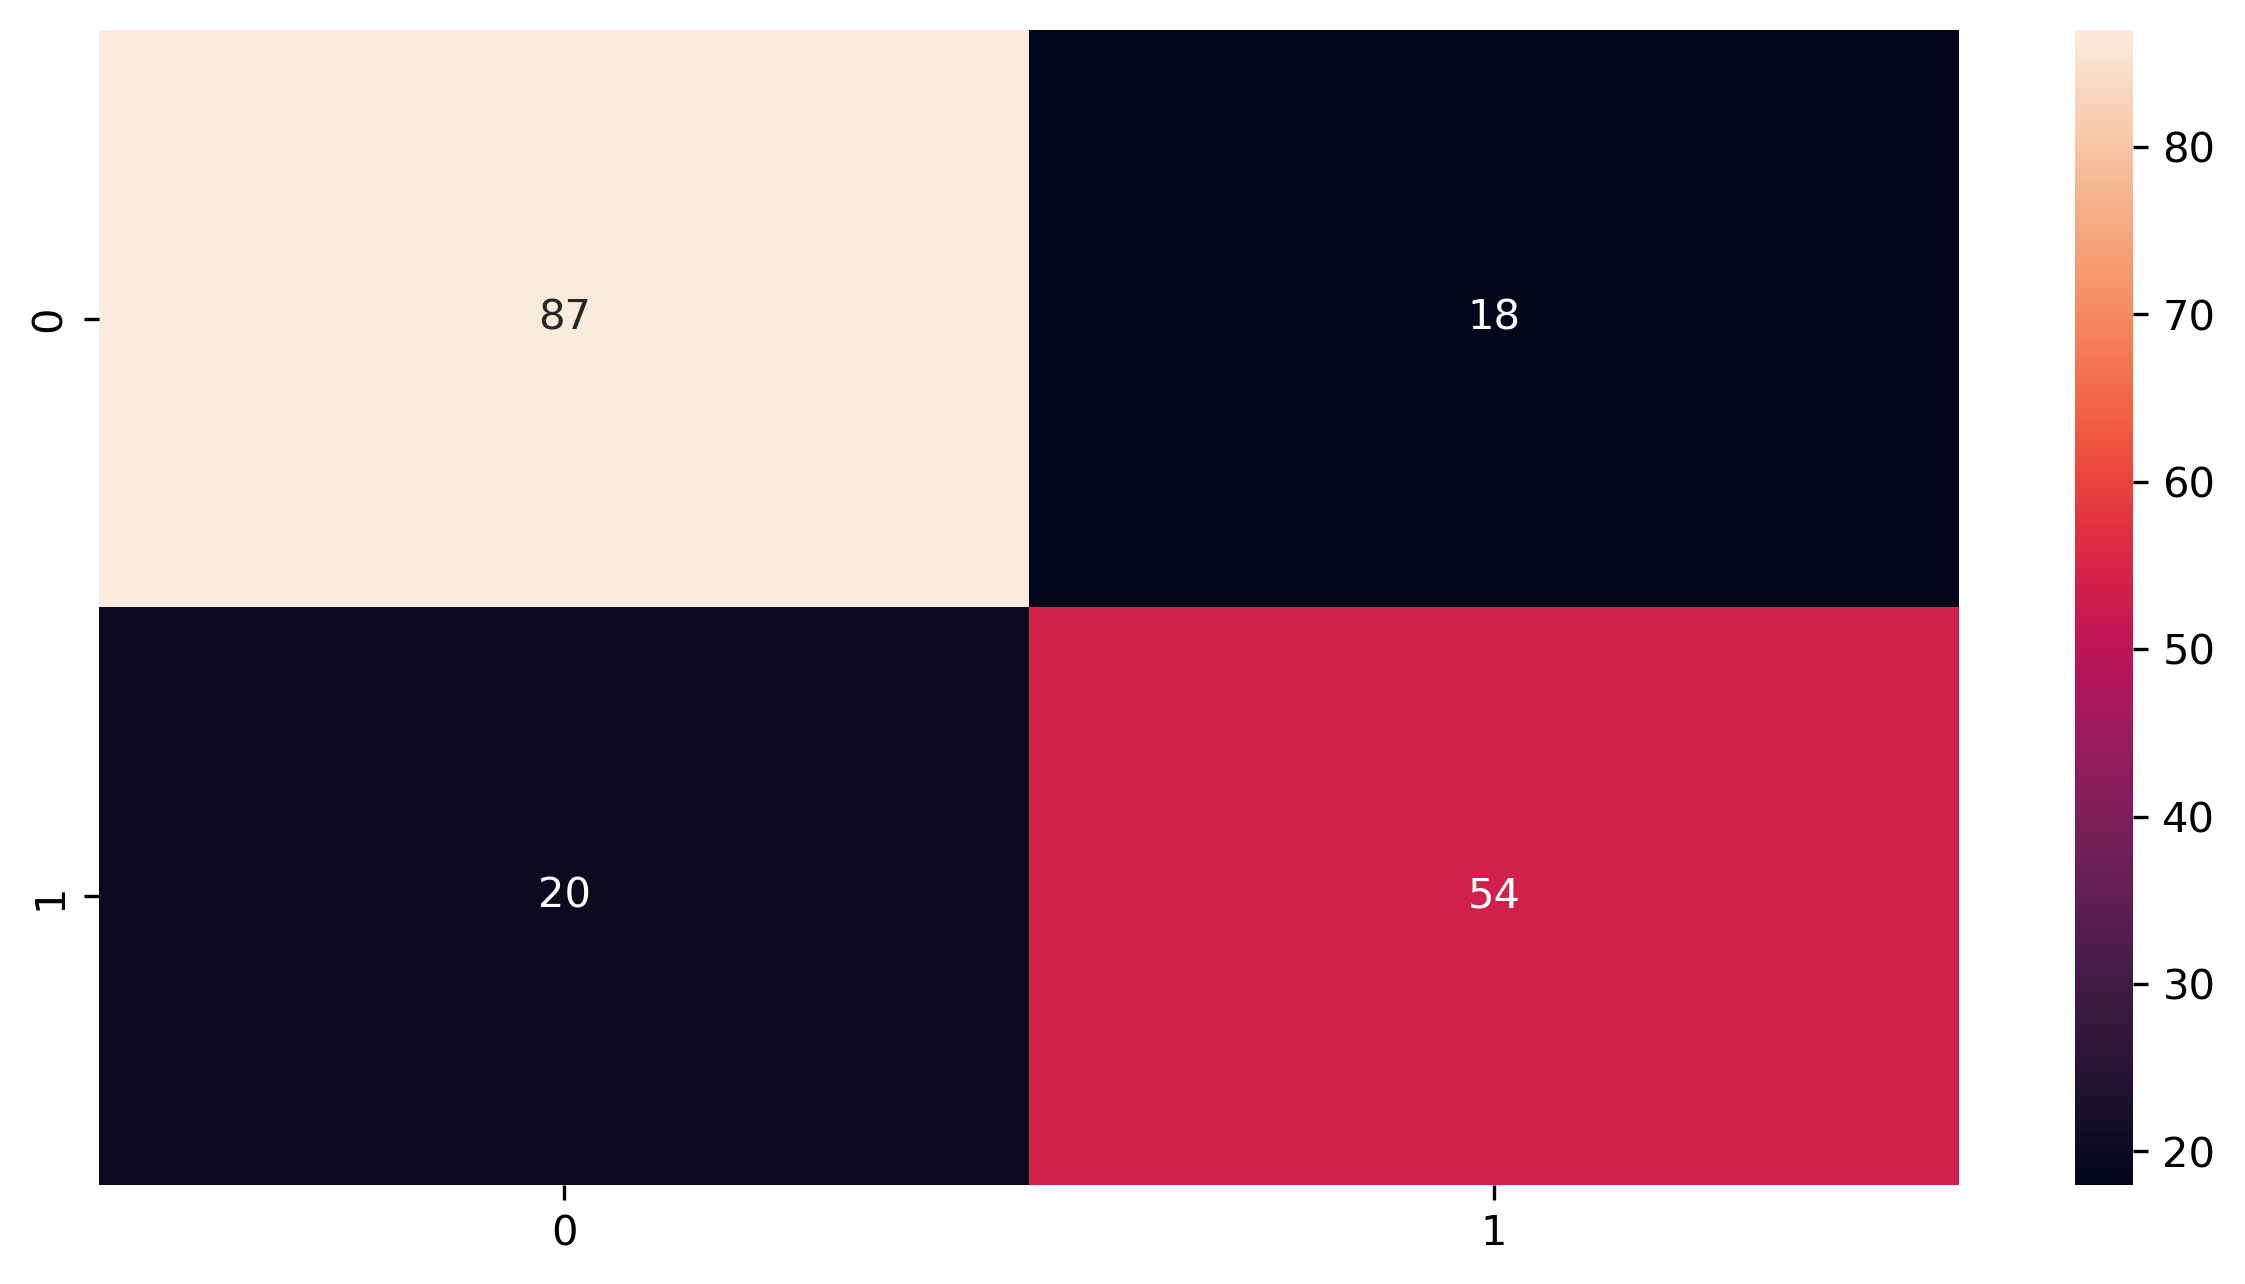

In [133]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt = 'g')

In [134]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       105
         1.0       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [135]:
roc_auc=roc_auc_score(ytest,ypred)

In [136]:
print(f'ROC AUC :{roc_auc}')

ROC AUC :0.7791505791505791


In [ ]:
#Interview Questions (from the document)
#1. Difference between precision and recall: 
ans:#Precision is the ratio of true positive predictions to the total predicted positives, while2. recall is the ratio of true positive predictions to the actual positives.

2):Importance of cross-validation: Cross-validation is a technique used to assess the generalizability of a model. It helps ensure that the model performs well on unseen data and reduces the risk of overfitting